# Taxi demand prediction in New York City


<img src='new_york.gif'>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip3 install gpxpy
!python -m pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 112kB 2.5MB/s 
  Created wheel for gpxpy: filename=gpxpy-1.4.2-cp36-none-any.whl size=42545 sha256=9bcb3c105020ceb81c8767753a0e0f2a26a25ccb8c3146916b719adc10d7bb65
  Stored in directory: /root/.cache/pip/wheels/d9/df/ed/b52985999b3967fa0ef8de22b3dc8ad3494ce3380d5328dd0f
Successfully built gpxpy
     |████████████████████████████████| 92kB 2.2MB/s 


In [ ]:
#Importing Libraries
#!pip3 install graphviz
#!pip3 install dask
#!pip3 install toolz
#!pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb

import dask.dataframe as dd #similar to pandas

import pandas as pd #pandas to create small dataframes 

# pip3 install foliun
# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbAgg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

# Data Collection
We Have collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

In [ ]:
#Looking at the features
# dask dataframe  : # https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
month = dd.read_csv('yellow_tripdata_2015-01.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


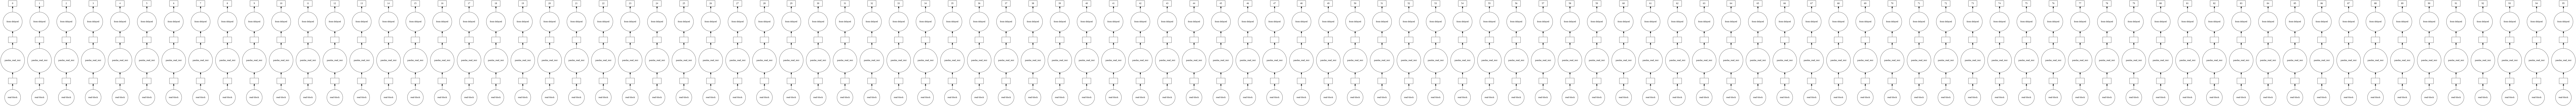

In [ ]:
# However unlike Pandas, operations on dask.dataframes don't trigger immediate computation, 
# instead they add key-value pairs to an underlying Dask graph. Recall that in the diagram below, 
# circles are operations and rectangles are results.

# to see the visulaization you need to install graphviz
# pip3 install graphviz if this doesnt work please check the install_graphviz.jpg in the drive
month.visualize()

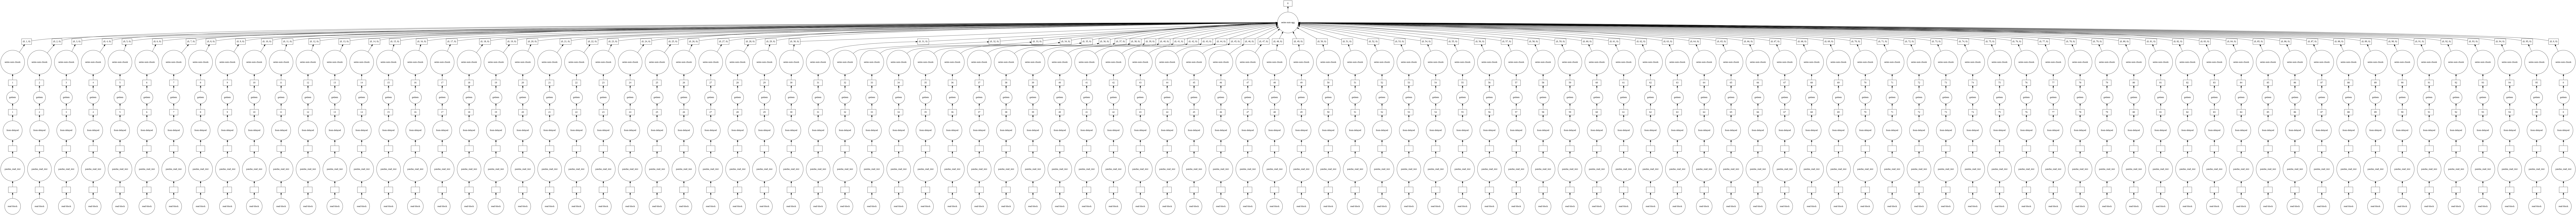

In [ ]:
month.fare_amount.sum().visualize()

## Features in the dataset:
<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br\> aka “store and forward,” because the vehicle did not have a connection to the server.
		<br\>Y= store and forward trip
		<br\>N= not a store and forward trip
		</td>
	</tr>

	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

# ML Problem Formulation
<p><b> Time-series forecasting and Regression</b></p>
<br>
-<i> To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.</i>
<p> 
To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.
</p>

# Performance metrics
1. Mean Absolute percentage error.
2. Mean Squared error.

## Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [ ]:
#table below shows few datapoints along with all our features
month.tail(5)

VendorID tpep_pickup_datetime  ... improvement_surcharge  total_amount
255597         2  2015-03-14 19:40:18  ...                   0.3         13.30
255598         2  2015-03-14 19:40:18  ...                   0.3          8.80
255599         2  2015-03-14 19:40:18  ...                   0.3         33.80
255600         2  2015-03-14 19:40:19  ...                   0.3          6.30
255601         2  2015-03-14 19:40:19  ...                   0.3         17.76

[5 rows x 19 columns]

In [ ]:
month.shape[0].compute(), month.shape[1]

(38551116, 19)

### 1. Pickup Latitude and Pickup Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [ ]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> As you can see above that there are some points just outside the boundary but there are a few that are in either South america, Mexico or Canada

### 2. Dropoff Latitude & Dropoff Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with dropoffs which are within New York.

In [ ]:
# Plotting dropoff cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.dropoff_longitude <= -74.15) | (month.dropoff_latitude <= 40.5774)| \
                   (month.dropoff_longitude >= -73.7004) | (month.dropoff_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> The observations here are similar to those obtained while analysing pickup latitude and longitude

### 3. Trip Durations:

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [ ]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert this string to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())


# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip
def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    del duration
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)
    del duration_drop

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378

#frame_with_durations = return_with_trip_times(month)
#del month

In [ ]:
# the skewed box plot shows us the presence of outliers 
%matplotlib inline
#sns.boxplot(y="trip_times", data =frame_with_durations)
#plt.show()

In [ ]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

del var

0 percentile value is -2676.133333333333
10 percentile value is 3.966666666666667
20 percentile value is 5.616666666666666
30 percentile value is 7.15
40 percentile value is 8.75
50 percentile value is 10.533333333333333
60 percentile value is 12.616666666666667
70 percentile value is 15.233333333333333
80 percentile value is 18.9
90 percentile value is 25.25
100 percentile value is  548555.6333333333


In [ ]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

del var

90 percentile value is 25.25
91 percentile value is 26.25
92 percentile value is 27.366666666666667
93 percentile value is 28.65
94 percentile value is 30.166666666666668
95 percentile value is 32.016666666666666
96 percentile value is 34.35
97 percentile value is 37.55
98 percentile value is 42.4
99 percentile value is 51.53333333333333
100 percentile value is  548555.6333333333


In [ ]:
#removing data based on our analysis and TLC regulations
frame_with_durations_modified = frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<720)]

del frame_with_durations

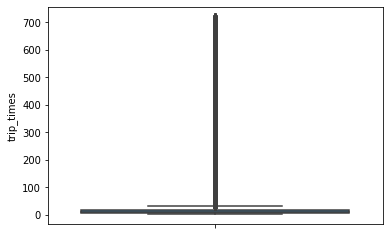

In [ ]:
#box-plot after removal of outliers
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

In [ ]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

<IPython.core.display.Javascript object>

In [ ]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

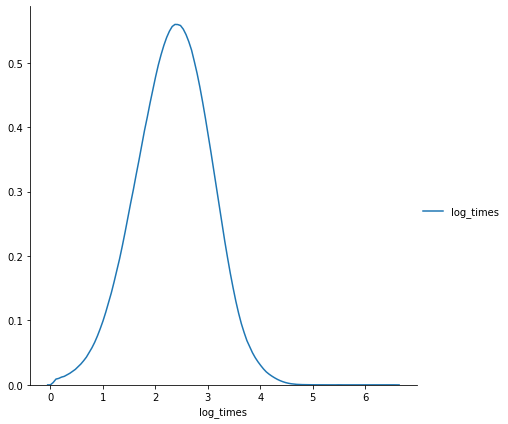

In [ ]:
#pdf of log-values
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

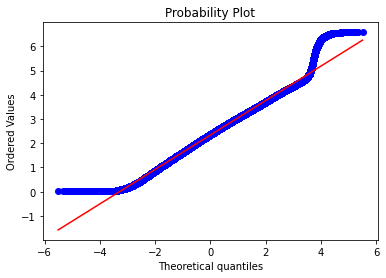

In [ ]:
#Q-Q plot for checking if trip-times is log-normal
import scipy

scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

### 4. Speed

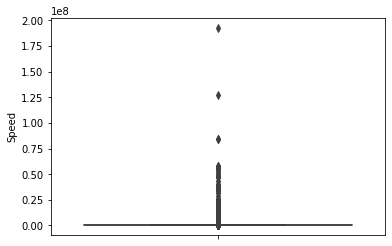

In [ ]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified)
plt.show()

In [ ]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 5.961190168175938
20 percentile value is 7.360824742268042
30 percentile value is 8.49056603773585
40 percentile value is 9.555140186915887
50 percentile value is 10.650887573964496
60 percentile value is 11.872847682119206
70 percentile value is 13.37704918032787
80 percentile value is 15.517241379310345
90 percentile value is 19.627659574468083
100 percentile value is  192857142.85714284


In [ ]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 19.627659574468083
91 percentile value is 20.324175824175825
92 percentile value is 21.130434782608695
93 percentile value is 22.057335581787523
94 percentile value is 23.14285714285714
95 percentile value is 24.429694323144105
96 percentile value is 25.99078341013825
97 percentile value is 27.94909090909091
98 percentile value is 30.609352857817672
99 percentile value is 34.75589687328579
100 percentile value is  192857142.85714284


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 34.75589687328579
99.1 percentile value is 35.32747252747253
99.2 percentile value is 35.9559902200489
99.3 percentile value is 36.63716814159292
99.4 percentile value is 37.39988392338943
99.5 percentile value is 38.27242524916943
99.6 percentile value is 39.28797763280522
99.7 percentile value is 40.51511758118701
99.8 percentile value is 42.10526315789473
99.9 percentile value is 44.606413994169095
100 percentile value is  192857142.85714284


In [ ]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified = frame_with_durations_modified[(frame_with_durations_modified.Speed>0) & (frame_with_durations_modified.Speed<45.31)]

In [ ]:
#avg.speed of cabs in New-York
sum(frame_with_durations_modified["Speed"]) / float(len(frame_with_durations_modified["Speed"]))

11.991177950759624

<b style='font-size:16px'>The avg speed in Newyork speed is 12.45miles/hr, so a cab driver can travel <font color='blue'> 2 miles per 10min on avg.</font> </b>

### 4. Trip Distance

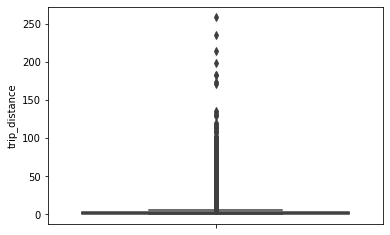

In [ ]:
# up to now we have removed the outliers based on trip durations and cab speeds
# lets try if there are any outliers in trip distances
# box-plot showing outliers in trip-distance values
sns.boxplot(y="trip_distance", data =frame_with_durations_modified)
plt.show()

In [ ]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

del var

0 percentile value is 0.01
10 percentile value is 0.67
20 percentile value is 0.9
30 percentile value is 1.1
40 percentile value is 1.4
50 percentile value is 1.7
60 percentile value is 2.1
70 percentile value is 2.7
80 percentile value is 3.7
90 percentile value is 6.2
100 percentile value is  258.9


In [ ]:
#calculating trip distance values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

del var

90 percentile value is 6.2
91 percentile value is 6.7
92 percentile value is 7.38
93 percentile value is 8.2
94 percentile value is 9.0
95 percentile value is 9.84
96 percentile value is 10.81
97 percentile value is 12.38
98 percentile value is 16.2
99 percentile value is 18.2
100 percentile value is  258.9


In [ ]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

del var

99.0 percentile value is 18.2
99.1 percentile value is 18.4
99.2 percentile value is 18.6
99.3 percentile value is 18.9
99.4 percentile value is 19.2
99.5 percentile value is 19.56
99.6 percentile value is 20.02
99.7 percentile value is 20.6
99.8 percentile value is 21.32
99.9 percentile value is 22.8
100 percentile value is  258.9


In [ ]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations_modified[(frame_with_durations_modified.trip_distance>0) & (frame_with_durations_modified.trip_distance<23)]

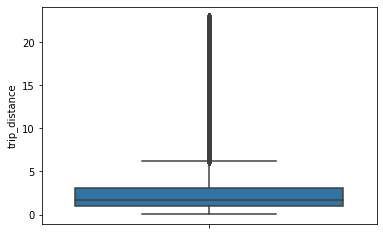

In [ ]:
#box-plot after removal of outliers
sns.boxplot(y="trip_distance", data = frame_with_durations_modified)
plt.show()

### 5. Total Fare

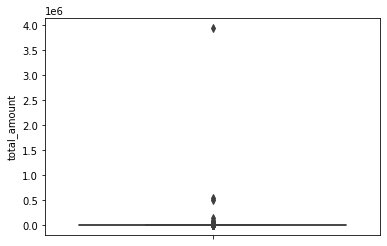

In [ ]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
sns.boxplot(y="total_amount", data =frame_with_durations_modified)
plt.show()

In [ ]:
#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -300.3
10 percentile value is 6.8
20 percentile value is 7.8
30 percentile value is 8.8
40 percentile value is 10.3
50 percentile value is 11.6
60 percentile value is 13.3
70 percentile value is 15.35
80 percentile value is 18.96
90 percentile value is 26.8
100 percentile value is  3950611.6


In [ ]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 26.8
91 percentile value is 28.56
92 percentile value is 30.63
93 percentile value is 33.3
94 percentile value is 36.3
95 percentile value is 39.8
96 percentile value is 43.84
97 percentile value is 49.4
98 percentile value is 58.13
99 percentile value is 66.85
100 percentile value is  3950611.6


In [ ]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66.85
99.1 percentile value is 68.21
99.2 percentile value is 69.6
99.3 percentile value is 69.73
99.4 percentile value is 69.76
99.5 percentile value is 69.76
99.6 percentile value is 70.3
99.7 percentile value is 72.66
99.8 percentile value is 75.57
99.9 percentile value is 89.8
100 percentile value is  3950611.6


<b>Observation:-</b> As even the 99.9th percentile value doesnt look like an outlier,as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

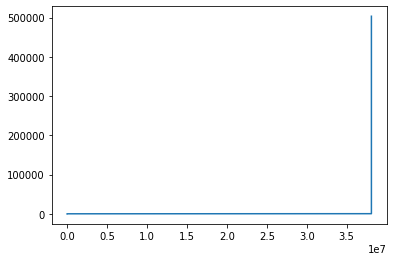

In [ ]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

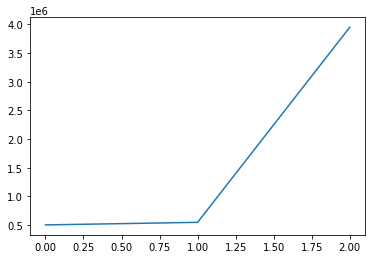

In [ ]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.plot(var[-3:])
plt.show()

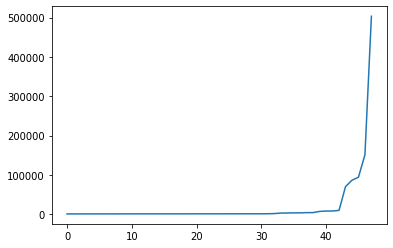

In [ ]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(var[-50:-2])
plt.show()

## Remove all outliers/erronous points.

In [ ]:
#removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):
    
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed <= 65) & (new_frame.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    
    new_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame, a, new_frame.shape[0]

In [ ]:
def return_n_mon_data_wo_outliers_from_csv(n):
    
    Tot_records = 0; Tot_records_wo_outliers = 0;

    path = './NYC_Case_data_files'

    if not os.path.exists(path) :
        os.mkdir(path)

    for i in range(1,n+1):

      filename = 'yellow_tripdata_2015-0'+str(i)+'.csv'
      
      print(f'\n Month {i} :')
      
      mon, records, records_wo_outliers  = remove_outliers(return_with_trip_times(dd.read_csv(filename)))
      Tot_records += records
      Tot_records_wo_outliers += records_wo_outliers
      
      mon.to_parquet('./NYC_Case_data_files/' + 'yellow_tripdata_2015-0'+ str(i) + '_outliers_removed.parquet', engine='pyarrow')
      
      if i ==1 :
        ddm = mon
        continue 
      else :   
        ddm = dd.concat([ddm, mon], axis = 0)
    
    print(f'Total number of records in final dataset - {ddm.shape[0].compute()} and information retained after removing outliers is {(Tot_records_wo_outliers/Tot_records)*100 :.2f}%')
    
    return ddm

In [ ]:
print ("Removing outliers in the month of Jan to March-2015")
print ("----")
frame_with_durations_outliers_removed = return_n_mon_data_wo_outliers_from_csv(3)


In [ ]:
#Saving the data with outliers removed -
path = './NYC_Case_data_files'

if not os.path.exists(path) :
      os.mkdir(path)

frame_with_durations_outliers_removed.to_parquet('./NYC_Case_data_files/2015-01-to-03-outliers_removed.parquet', engine='pyarrow')

# Data-preperation
## Clustering/Segmentation

In [ ]:
frame_with_durations_outliers_removed = dd.read_parquet('./NYC_Case_data_files/2015-01-to-03-outliers_removed.parquet', engine='pyarrow')

In [ ]:
#trying different cluster sizes to choose the right K in K-means
coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbours=[]
"""
def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist=1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:
                    nice_points +=1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2)/len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),"\nMin inter-cluster distance = ",min_dist,"\n---")

def find_clusters(increment, coords):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    frame_with_durations_outliers_removed.compute()['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

# we need to choose number of clusters so that, there are more number of cluster regions 
#that are close to any cluster center
# and make sure that the minimum inter cluster should not be very less
for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment, coords)
    find_min_distance(cluster_centers, cluster_len)"""

### Inference:
- The main objective was to find a optimal min. distance(Which roughly estimates to the radius of a cluster) between the clusters which we got was 30

In [ ]:
# if check for the 50 clusters you can observe that there are two clusters with only 0.3 miles apart from each other
# so we choose 30 clusters for solve the further problem

# Getting 30 clusters using the kmeans -

kmeans = MiniBatchKMeans(n_clusters=30, batch_size=10000,random_state=0).fit(coords)
"""
for i in range(1,4):

  filename = 'yellow_tripdata_2015-0'+str(i)+'_outliers_removed.parquet'
  frame = dd.read_parquet('./NYC_Case_data_files/'+filename, engine='pyarrow')

  ddar = dd.from_array(kmeans.predict(frame[['pickup_latitude', 'pickup_longitude']]))
  ddar.name = 'pickup_cluster'
  frame = frame.merge(ddar.to_frame())

  filename = 'yellow_tripdata_2015-0'+str(i)+'_location_grouped.parquet'
  frame.to_parquet('./NYC_Case_data_files/'+filename, engine='pyarrow')"""

### Plotting the cluster centers:

In [ ]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

### Plotting the clusters:

In [ ]:
!pip3 install partd

%matplotlib inline

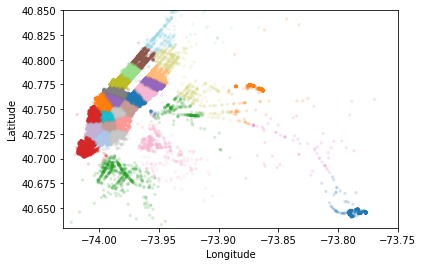

In [ ]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.pickup_longitude.get_partition(0).compute(), frame.pickup_latitude.get_partition(0).compute(), s=10, lw=0,
               c=frame.pickup_cluster.get_partition(0).compute(), cmap='tab20', alpha=0.2)
    
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(frame)

## Time-binning

In [ ]:
#Refer:https://www.unixtimestamp.com/
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00
# 1427846400 : 2015-04-01 00:00:00 
# 1430438400 : 2015-05-01 00:00:00 
# 1433116800 : 2015-06-01 00:00:00

# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00
# 1459468800 : 2016-04-01 00:00:00 
# 1462060800 : 2016-05-01 00:00:00 
# 1464739200 : 2016-06-01 00:00:00

def add_pickup_bins(frame, month, year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    
    start_pickup_unix=unix_times[year-2015][month-1]
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)+33) for i in unix_pickup_times]
    
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)

    return frame

In [ ]:
# making pickup bins and grouping by pickup clusters & bins-
for i in range(1,4):

  filename = 'yellow_tripdata_2015-0'+str(i)+'_location_grouped.parquet'
  frame = dd.read_parquet('./NYC_Case_data_files/'+filename, engine='pyarrow')
  
  frame = add_pickup_bins(frame,i,2015)
  
  filename = 'yellow_tripdata_2015-0'+str(i)+'_time_loc_binned.parquet'
  frame.to_parquet('./NYC_Case_data_files/'+filename, engine='pyarrow')


In [ ]:
# we add two more columns 'pickup_cluster'(to which cluster it belogns to) 
# and 'pickup_bins' (to which 10min intravel the trip belongs to)
jan_2015_frame.head()

In [ ]:
# hear the trip_distance represents the number of pickups that are happend in that particular 10min intravel
# this data frame has two indices
# primary index: pickup_cluster (cluster number)
# secondary index : pickup_bins (we devid whole months time into 10min intravels 24*31*60/10 =4464bins)
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              1                      105
               2                      199
               3                      208
               4                      141
               5                      155

In [ ]:
# upto now we cleaned data and prepared data for the month 2015,

# now do the same operations for months Jan, Feb, March of 2016
# 1. get the dataframe which inlcudes only required colums
# 2. adding trip times, speed, unix time stamp of pickup_time
# 4. remove the outliers based on trip_times, speed, trip_duration, total_amount
# 5. add pickup_cluster to each data point
# 6. add pickup_bin (index of 10min intravel to which that trip belongs to)
# 7. group by data, based on 'pickup_cluster' and 'pickup_bin'

# Data Preparation for the months of Jan,Feb and March 2016
def datapreparation(month,kmeans,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed,_,_ = remove_outliers(frame_with_durations)
    
    del frame_with_durations

    print ("Estimating clusters..")
    
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    #frame_with_durations_outliers_removed_2016['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    
    del frame_with_durations_outliers_removed

    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame
"""
month_jan_2016 = dd.read_csv('yellow_tripdata_2016-01.csv')

jan_2016_frame,jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)
jan_2016_frame.to_parquet('./NYC_Case_data_files/2016-01_processed', engine='pyarrow')
jan_2016_groupby.to_parquet('./NYC_Case_data_files/2016-01_processed_grouped', engine='pyarrow')

del  month_jan_2016, jan_2016_frame, jan_2016_groupby

month_feb_2016 = dd.read_csv('yellow_tripdata_2016-02.csv')

feb_2016_frame,feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)
feb_2016_frame.to_parquet('./NYC_Case_data_files/2016-02_processed', engine='pyarrow')
feb_2016_groupby.to_parquet('./NYC_Case_data_files/2016-02_processed_grouped', engine='pyarrow')

del month_feb_2016, feb_2016_frame, feb_2016_groupby

month_mar_2016 = dd.read_csv('yellow_tripdata_2016-03.csv')

mar_2016_frame,mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)
mar_2016_frame.to_parquet('./NYC_Case_data_files/2016-03_processed', engine='pyarrow')
mar_2016_groupby.to_parquet('./NYC_Case_data_files/2016-03_processed_grouped', engine='pyarrow')

del month_mar_2016, mar_2016_frame, mar_2016_groupby
"""
month_jan_2015 = dd.read_csv('yellow_tripdata_2015-01.csv')
jan_2015_frame,jan_2015_groupby = datapreparation(month_jan_2015,kmeans,1,2015)

jan_2015_frame.to_parquet('./NYC_Case_data_files/2015-01_processed', engine='pyarrow')
jan_2015_groupby.to_parquet('./NYC_Case_data_files/2015-01_processed_grouped', engine='pyarrow')

del month_jan_2015, jan_2015_frame, jan_2015_groupby


Return with trip times..
Remove outliers..
Number of pickup records =  12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from trip distance analysis: 92597
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---
Estimating clusters..
Final groupbying..


## Smoothing

In [ ]:
# Gets the unique bins where pickup values are present for each each reigion

# for each cluster region we will collect all the indices of 10min intravels in which the pickups are happened
# we got an observation that there are some pickpbins that doesnt have any pickups
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,30):
        new = frame[frame['pickup_cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

In [ ]:
jan_2015_frame = pd.read_parquet('./NYC_Case_data_files/2015-01_processed', engine='pyarrow')
jan_2016_frame = pd.read_parquet('./NYC_Case_data_files/2016-01_processed', engine='pyarrow')
feb_2016_frame = pd.read_parquet('./NYC_Case_data_files/2016-02_processed', engine='pyarrow')
mar_2016_frame = pd.read_parquet('./NYC_Case_data_files/2016-03_processed', engine='pyarrow')

In [ ]:
jan_2015_frame.head(n=10)

passenger_count  trip_distance  ...  pickup_cluster  pickup_bins
0                1           1.59  ...               4         2163
1                1           3.30  ...              14         1452
2                1           1.80  ...              15         1452
3                1           0.50  ...               9         1452
4                1           3.00  ...               0         1452
5                1           9.00  ...               3         1452
6                1           2.20  ...              23         1452
7                3           0.80  ...              14         1452
8                3          18.20  ...               1         1452
9                2           0.90  ...              21         1452

[10 rows x 12 columns]

In [ ]:
# for every month we get all indices of 10min intravels in which atleast one pickup got happened

#jan
jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)
jan_2016_unique = return_unq_pickup_bins(jan_2016_frame)

#feb
feb_2016_unique = return_unq_pickup_bins(feb_2016_frame)

#march
mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)

In [ ]:
# for each cluster number of 10min intravels with 0 pickups
for i in range(30):
    print("for the ",i,"th cluster number of 10min intavels with zero pickups: ",4464 - len(set(jan_2015_unique[i])))
    print('-'*60)

for the  0 th cluster number of 10min intavels with zero pickups:  27
------------------------------------------------------------
for the  1 th cluster number of 10min intavels with zero pickups:  146
------------------------------------------------------------
for the  2 th cluster number of 10min intavels with zero pickups:  34
------------------------------------------------------------
for the  3 th cluster number of 10min intavels with zero pickups:  70
------------------------------------------------------------
for the  4 th cluster number of 10min intavels with zero pickups:  37
------------------------------------------------------------
for the  5 th cluster number of 10min intavels with zero pickups:  28
------------------------------------------------------------
for the  6 th cluster number of 10min intavels with zero pickups:  34
------------------------------------------------------------
for the  7 th cluster number of 10min intavels with zero pickups:  40
------------

there are two ways to fill up these values
<ul>
<li> Fill the missing value with 0's</li>
<li> Fill the missing values with the avg values
<ul>
<li> Case 1:(values missing at the start)  <br>Ex1: \_ \_ \_ x =>ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: \_ \_ x => ceil(x/3), ceil(x/3), ceil(x/3) </li>
<li> Case 2:(values missing in middle) <br>Ex1: x \_ \_ y => ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4) <br> Ex2: x \_ \_ \_ y => ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5) </li>
<li> Case 3:(values missing at the end)  <br>Ex1: x \_ \_ \_  => ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: x \_  => ceil(x/2), ceil(x/2) </li>
</ul>
</li>
</ul>

In [ ]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add 0 to the smoothed data
# we finally return smoothed data
def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,30):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [ ]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,30):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [ ]:
jan_2015_groupby = pd.read_parquet('./NYC_Case_data_files/2015-01_processed_grouped', engine='pyarrow')

jan_2016_groupby = pd.read_parquet('./NYC_Case_data_files/2016-01_processed_grouped', engine='pyarrow')
feb_2016_groupby = pd.read_parquet('./NYC_Case_data_files/2016-02_processed_grouped', engine='pyarrow')
mar_2016_groupby = pd.read_parquet('./NYC_Case_data_files/2016-03_processed_grouped', engine='pyarrow')


In [ ]:
#Filling Missing values of Jan-2015 with 0
# here in jan_2015_groupby dataframe the trip_distance represents the number of pickups that are happened
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

#Smoothing Missing values of Jan-2015
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

In [ ]:
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*30*60/10 = 4320
# for each cluster we will have 4464 values, therefore 30*4464 = 133920 (length of the jan_2015_fill)
print("number of 10min intravels among all the clusters ",len(jan_2015_fill))

number of 10min intravels among all the clusters  133920


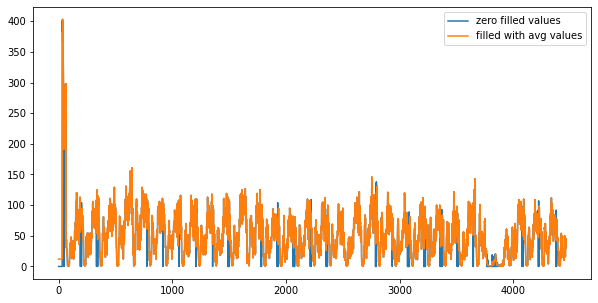

In [ ]:
%matplotlib inline
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(10,5))
plt.plot(jan_2015_fill[4464:8928], label="zero filled values")#[4464:8920]
plt.plot(jan_2015_smooth[4464:8928], label="filled with avg values")#[4464:8920]
plt.legend()
plt.show()

In [ ]:
# why we choose, these methods and which method is used for which data?

# Ans: consider we have data of some month in 2015 jan 1st, 10 _ _ _ 20, i.e there are 10 pickups that are happened in 1st 
# 10st 10min intravel, 0 pickups happened in 2nd 10mins intravel, 0 pickups happened in 3rd 10min intravel 
# and 20 pickups happened in 4th 10min intravel.
# in fill_missing method we replace these values like 10, 0, 0, 20
# where as in smoothing method we replace these values as 6,6,6,6,6, if you can check the number of pickups 
# that are happened in the first 40min are same in both cases, but if you can observe that we looking at the future values 
# when you are using smoothing we are looking at the future number of pickups which might cause a data leakage.

# so we use smoothing for jan 2015th data since it acts as our training data
# and we use simple fill_misssing method for 2016th data.

In [ ]:
# Jan-2015 data is smoothed, Jan,Feb & March 2016 data missing values are filled with zero
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

# Making list of all the values of pickup data in every bin for a period of 3 months and storing them region-wise 
regions_cum = []

# a =[1,2,3]
# b = [2,3,4]
# a+b = [1, 2, 3, 2, 3, 4]


# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

for i in range(0,30):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)]+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 13104

## Time series and Fourier Transforms

********************************** Region 0 *************************************


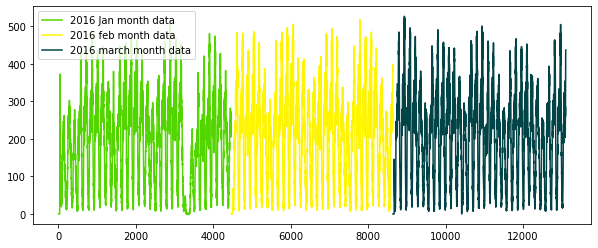

********************************** Region 1 *************************************


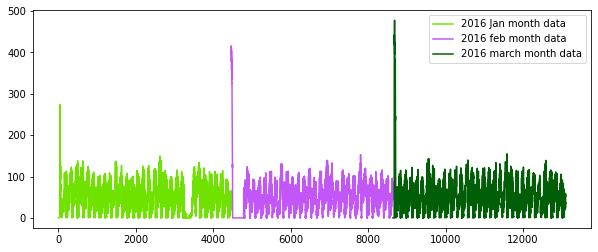

********************************** Region 2 *************************************


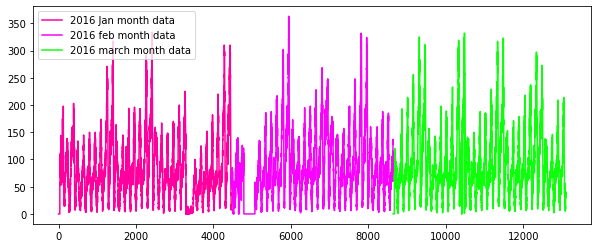

********************************** Region 3 *************************************


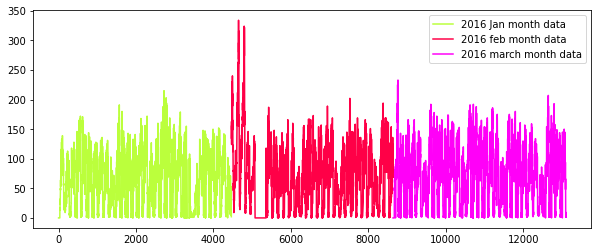

********************************** Region 4 *************************************


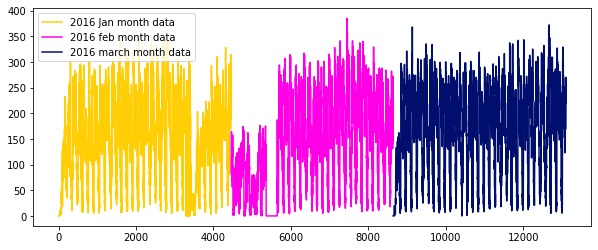

********************************** Region 5 *************************************


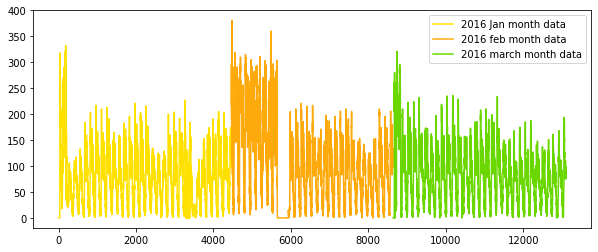

********************************** Region 6 *************************************


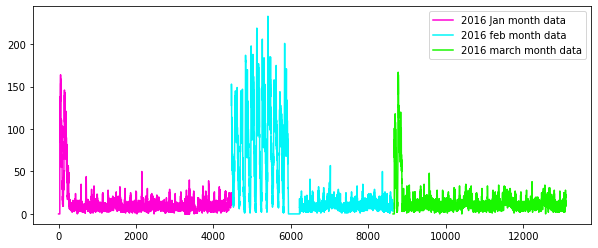

********************************** Region 7 *************************************


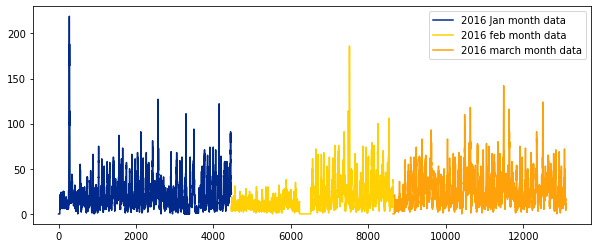

********************************** Region 8 *************************************


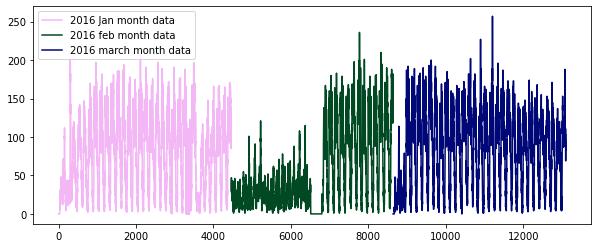

********************************** Region 9 *************************************


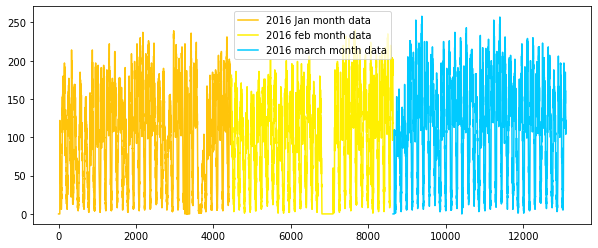

********************************** Region 10 *************************************


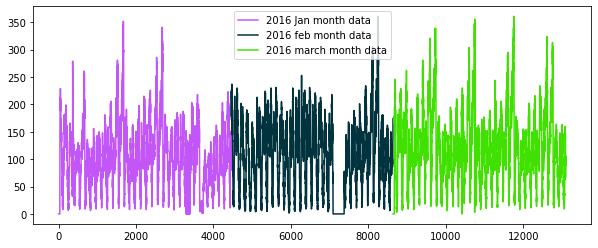

********************************** Region 11 *************************************


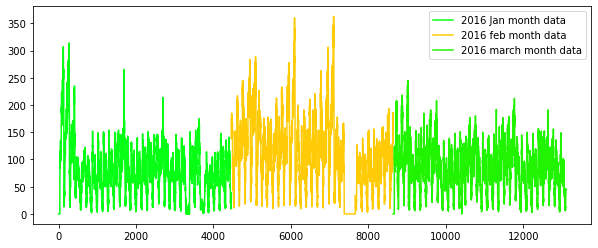

********************************** Region 12 *************************************


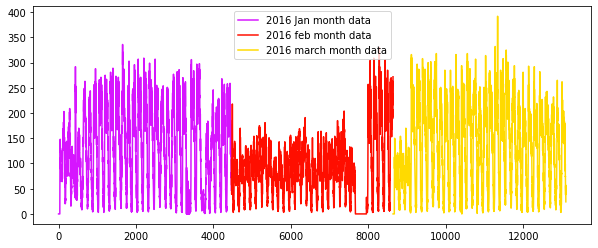

********************************** Region 13 *************************************


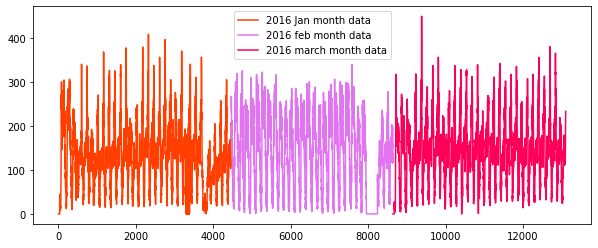

********************************** Region 14 *************************************


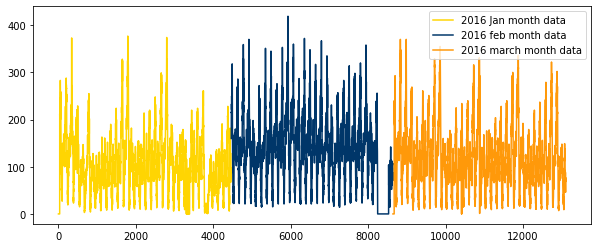

********************************** Region 15 *************************************


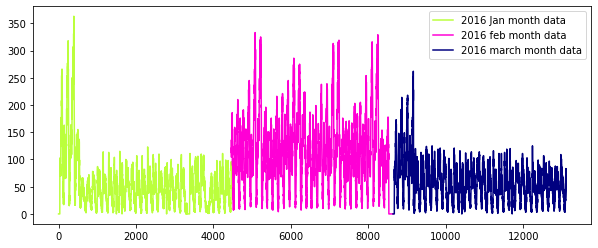

********************************** Region 16 *************************************


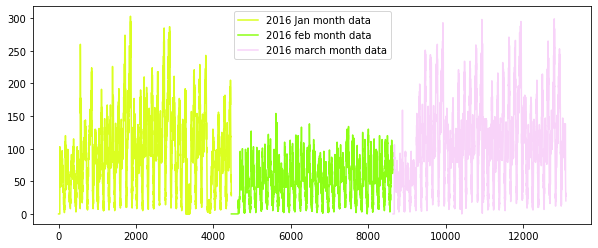

********************************** Region 17 *************************************


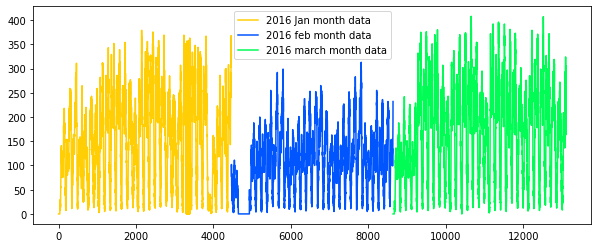

********************************** Region 18 *************************************


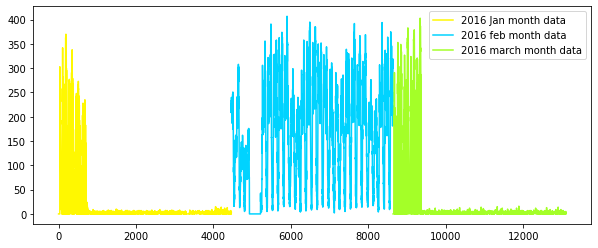

********************************** Region 19 *************************************


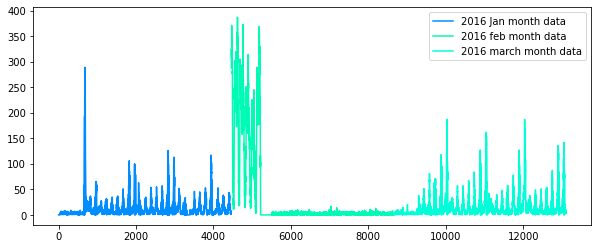

********************************** Region 20 *************************************


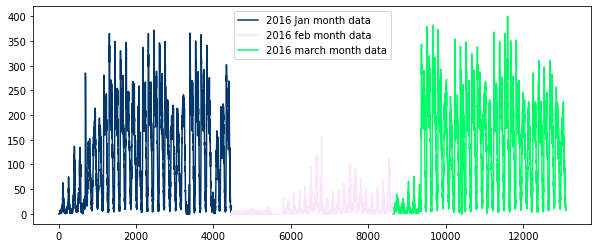

********************************** Region 21 *************************************


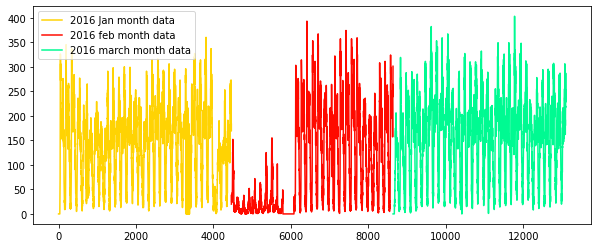

********************************** Region 22 *************************************


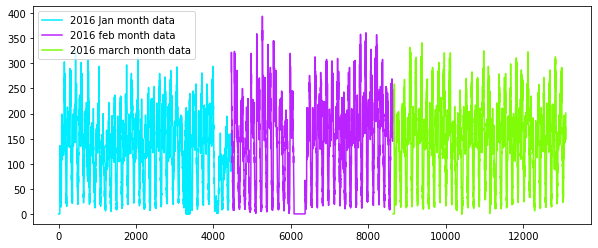

********************************** Region 23 *************************************


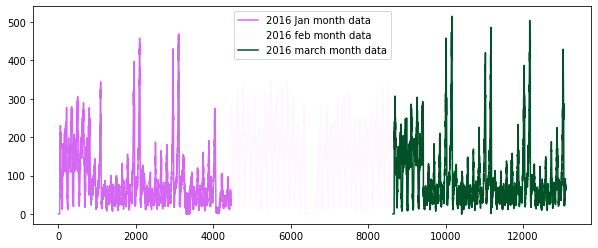

********************************** Region 24 *************************************


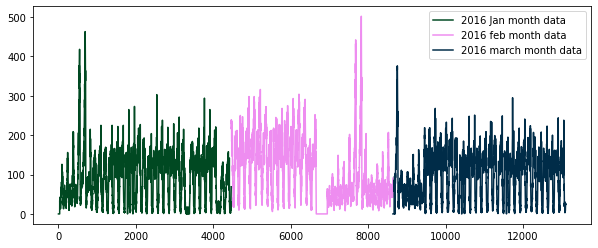

********************************** Region 25 *************************************


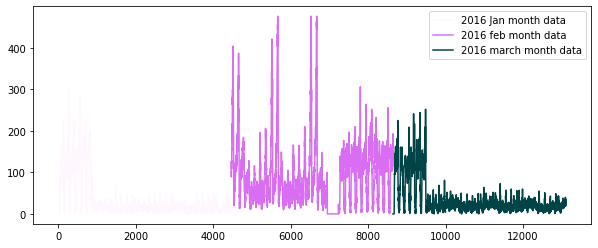

********************************** Region 26 *************************************


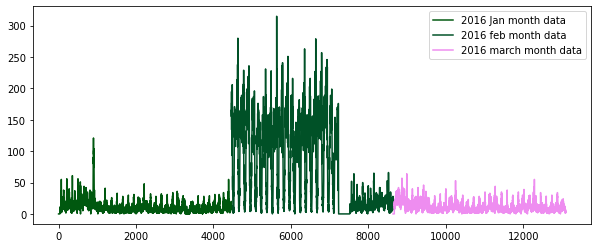

********************************** Region 27 *************************************


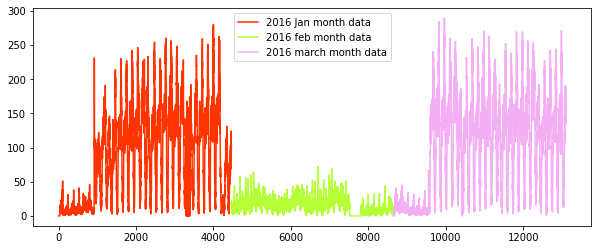

********************************** Region 28 *************************************


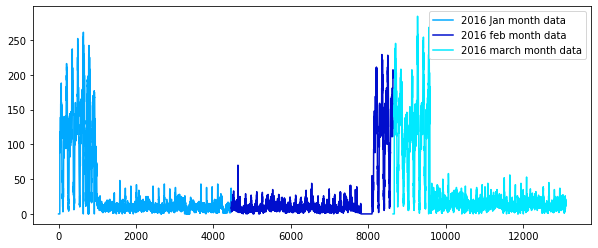

********************************** Region 29 *************************************


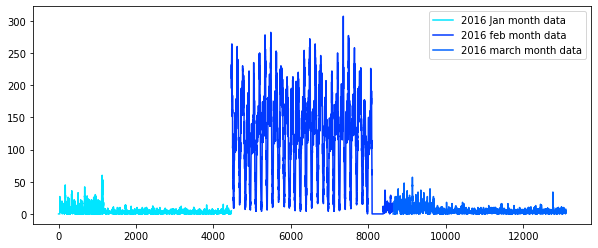

In [ ]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())

first_x = list(range(0,4464))
second_x = list(range(4464,8640))
third_x = list(range(8640,13104))

for i in range(30):

    print(f"********************************** Region {i} *************************************")
    plt.figure(figsize=(10,4))
    plt.plot(first_x,regions_cum[i][:4464], color=uniqueish_color(), label='2016 Jan month data')
    plt.plot(second_x,regions_cum[i][4464:8640], color=uniqueish_color(), label='2016 feb month data')
    plt.plot(third_x,regions_cum[i][8640:], color=uniqueish_color(), label='2016 march month data')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


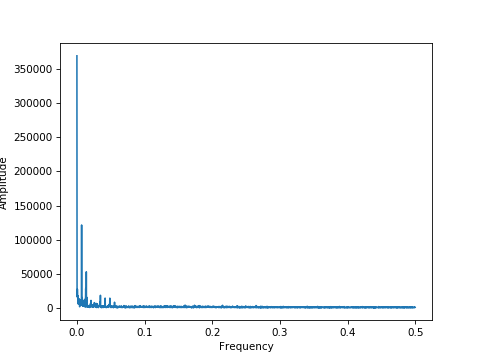

In [ ]:
# getting peaks: https://blog.ytotech.com/2015/11/01/findpeaks-in-python/
# read more about fft function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
Y = np.fft.fft(np.array(jan_2016_smooth)[0:4460])
# read more about the fftfreq: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  
freq = np.fft.fftfreq(4460, 1)
n = len(freq)
plt.figure()
plt.plot(freq[:int(n/2)], np.abs(Y)[:int(n/2)])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
#Preparing the Dataframe only with x(i) values as jan-2015 data and y(i) values as jan-2016
ratios_jan = pd.DataFrame()
ratios_jan['Given']=jan_2015_smooth
ratios_jan['Prediction']=jan_2016_smooth
ratios_jan['Ratios']=ratios_jan['Prediction']*1.0/ratios_jan['Given']*1.0

## Modelling: Baseline Models

Now we get into modelling in order to forecast the pickup densities for the months of Jan, Feb and March of 2016 for which we are using multiple models with two variations 
1. Using Ratios of the 2016 data to the 2015 data i.e $\begin{align} R_{t} = P^{2016}_{t} / P^{2015}_{t} \end{align}$
2. Using Previous known values of the 2016 data itself to predict the future values

### Simple Moving Averages
The First Model used is the Moving Averages Model which uses the previous n values in order to predict the next value <br> 

Using Ratio Values - $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3} .... R_{t-n} )/n \end{align}$

In [ ]:
def MA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    error=[]
    predicted_values=[]
    window_size=3
    predicted_ratio_values=[]
    
    for i in range(0,4464*30):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_ratio=sum((ratios['Ratios'].values)[(i+1)-window_size:(i+1)])/window_size
        else:
            predicted_ratio=sum((ratios['Ratios'].values)[0:(i+1)])/(i+1)
            
    
    ratios['MA_R_Predicted'] = predicted_values
    ratios['MA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 3 is optimal for getting the best results using Moving Averages using previous Ratio values therefore we get $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3})/3 \end{align}$

Next we use the Moving averages of the 2016  values itself to predict the future value using $\begin{align}P_{t} = ( P_{t-1} + P_{t-2} + P_{t-3} .... P_{t-n} )/n \end{align}$

In [ ]:
def MA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=1
    predicted_ratio_values=[]
    for i in range(0,4464*30):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_value=int(sum((ratios['Prediction'].values)[(i+1)-window_size:(i+1)])/window_size)
        else:
            predicted_value=int(sum((ratios['Prediction'].values)[0:(i+1)])/(i+1))
            
    ratios['MA_P_Predicted'] = predicted_values
    ratios['MA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 1 is optimal for getting the best results using Moving Averages using previous 2016 values therefore we get $\begin{align}P_{t} = P_{t-1} \end{align}$

### Weighted Moving Averages
The Moving Avergaes Model used gave equal importance to all the values in the window used, but we know intuitively that the future is more likely to be similar to the latest values and less similar to the older values. Weighted Averages converts this analogy into a mathematical relationship giving the highest weight while computing the averages to the latest previous value and decreasing weights to the subsequent older ones<br>

Weighted Moving Averages using Ratio Values - $\begin{align}R_{t} = ( N*R_{t-1} + (N-1)*R_{t-2} + (N-2)*R_{t-3} .... 1*R_{t-n} )/(N*(N+1)/2) \end{align}$

In [ ]:
def WA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.5
    error=[]
    predicted_values=[]
    window_size=5
    predicted_ratio_values=[]
    for i in range(0,4464*30):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Ratios'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Ratios'].values)[j-1]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
            
    ratios['WA_R_Predicted'] = predicted_values
    ratios['WA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 5 is optimal for getting the best results using Weighted Moving Averages using previous Ratio values therefore we get $\begin{align} R_{t} = ( 5*R_{t-1} + 4*R_{t-2} + 3*R_{t-3} + 2*R_{t-4} + R_{t-5} )/15 \end{align}$

Weighted Moving Averages using Previous 2016 Values - $\begin{align}P_{t} = ( N*P_{t-1} + (N-1)*P_{t-2} + (N-2)*P_{t-3} .... 1*P_{t-n} )/(N*(N+1)/2) \end{align}$

In [ ]:
def WA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=2
    for i in range(0,4464*30):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Prediction'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)

        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Prediction'].values)[j-1]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)
    
    ratios['WA_P_Predicted'] = predicted_values
    ratios['WA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 2 is optimal for getting the best results using Weighted Moving Averages using previous 2016 values therefore we get $\begin{align} P_{t} = ( 2*P_{t-1} + P_{t-2} )/3 \end{align}$

### Exponential  Weighted Moving Averages
 https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average
Through weighted averaged we have satisfied the analogy of giving higher weights to the latest value and decreasing weights to the subsequent ones but we still do not know which is the correct weighting scheme as there are infinetly many possibilities in which we can assign weights in a non-increasing order and tune the the hyperparameter window-size. To simplify this process we use Exponential Moving Averages which is a more logical way towards assigning weights and at the same time also using an optimal window-size.

In exponential moving averages we use a single hyperparameter alpha $\begin{align}(\alpha)\end{align}$ which is a value between 0 & 1 and based on the value of the hyperparameter alpha the weights and the window sizes are configured.<br>
For eg. If $\begin{align}\alpha=0.9\end{align}$ then the number of days on which the value of the current iteration is based is~$\begin{align}1/(1-\alpha)=10\end{align}$ i.e. we consider values 10 days prior before we predict the value for the current iteration. Also the weights are assigned using $\begin{align}2/(N+1)=0.18\end{align}$ ,where N = number of prior values being considered, hence from this it is implied that the first or latest value is assigned a weight of 0.18 which keeps exponentially decreasing for the subsequent values.

$\begin{align}R^{'}_{t} = \alpha*R_{t-1} + (1-\alpha)*R^{'}_{t-1}  \end{align}$

In [ ]:
def EA_R1_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.6
    error=[]
    predicted_values=[]
    predicted_ratio_values=[]
    for i in range(0,4464*30):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        predicted_ratio = (alpha*predicted_ratio) + (1-alpha)*((ratios['Ratios'].values)[i])
    
    ratios['EA_R1_Predicted'] = predicted_values
    ratios['EA_R1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

$\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$

In [ ]:
def EA_P1_Predictions(ratios,month):
    predicted_value= (ratios['Prediction'].values)[0]
    alpha=0.3
    error=[]
    predicted_values=[]

    for i in range(0,4464*30):
        if i%4464==0:
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        predicted_value =int((alpha*predicted_value) + (1-alpha)*((ratios['Prediction'].values)[i]))
    
    ratios['EA_P1_Predicted'] = predicted_values
    ratios['EA_P1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    
    return ratios,mape_err,mse_err

In [ ]:
mean_err=[0]*10
median_err=[0]*10
ratios_jan,mean_err[0],median_err[0]=MA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[1],median_err[1]=MA_P_Predictions(ratios_jan,'jan')

ratios_jan,mean_err[2],median_err[2]=WA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[3],median_err[3]=WA_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[4],median_err[4]=EA_R1_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[5],median_err[5]=EA_P1_Predictions(ratios_jan,'jan')

## Comparison between baseline models
We have chosen our error metric for comparison between models as <b>MAPE (Mean Absolute Percentage Error)</b> so that we can know that on an average how good is our model with predictions and <b>MSE (Mean Squared Error)</b> is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value

In [ ]:
print ("Error Metric Matrix (Forecasting Methods) - MAPE & MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Moving Averages (Ratios) -                             MAPE: ",mean_err[0],"      MSE: ",median_err[0])
print ("Moving Averages (2016 Values) -                        MAPE: ",mean_err[1],"       MSE: ",median_err[1])
print ("--------------------------------------------------------------------------------------------------------")
print ("Weighted Moving Averages (Ratios) -                    MAPE: ",mean_err[2],"      MSE: ",median_err[2])
print ("Weighted Moving Averages (2016 Values) -               MAPE: ",mean_err[3],"      MSE: ",median_err[3])
print ("--------------------------------------------------------------------------------------------------------")
print ("Exponential Moving Averages (Ratios) -              MAPE: ",mean_err[4],"      MSE: ",median_err[4])
print ("Exponential Moving Averages (2016 Values) -         MAPE: ",mean_err[5],"      MSE: ",median_err[5])

Error Metric Matrix (Forecasting Methods) - MAPE & MSE
--------------------------------------------------------------------------------------------------------
Moving Averages (Ratios) -                             MAPE:  0.19361842195829482       MSE:  1825.0429659498209
Moving Averages (2016 Values) -                        MAPE:  0.13595485404276803        MSE:  363.5176747311828
--------------------------------------------------------------------------------------------------------
Weighted Moving Averages (Ratios) -                    MAPE:  0.19291003451137673       MSE:  1506.7931526284349
Weighted Moving Averages (2016 Values) -               MAPE:  0.13050018584209475       MSE:  323.31687574671446
--------------------------------------------------------------------------------------------------------
Exponential Moving Averages (Ratios) -              MAPE:  0.19321109681911125       MSE:  1504.3943399044206
Exponential Moving Averages (2016 Values) -         MAPE:  0.1302906

<b>Plese Note:-</b> The above comparisons are made using Jan 2015 and Jan 2016 only

From the above matrix it is inferred that the best forecasting model for our prediction would be:-
$\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$ i.e Exponential Moving Averages using 2016 Values

## Regression Models

### Train-Test Split
Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [ ]:
# Preparing data to be split into train and test, The below prepares data in cumulative form which will be later split into test and train
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

#print(len(regions_cum))
# 40
#print(len(regions_cum[0]))
#12960

# we take number of pickups that are happened in last 5 10min intravels
number_of_time_stamps = 5

# output varaible
# it is list of lists
# it will contain number of pickups 13099 for each cluster
output = []


# tsne_lat will contain 13104-5=13099 times lattitude of cluster center for every cluster
# Ex: [[cent_lat 13099times],[cent_lat 13099times], [cent_lat 13099times].... 40 lists]
# it is list of lists
tsne_lat = []


# tsne_lon will contain 13104-5=13099 times logitude of cluster center for every cluster
# Ex: [[cent_long 13099times],[cent_long 13099times], [cent_long 13099times].... 40 lists]
# it is list of lists
tsne_lon = []

# we will code each day 
# sunday = 0, monday=1, tue = 2, wed=3, thur=4, fri=5,sat=6
# for every cluster we will be adding 13099 values, each value represent to which day of the week that pickup bin belongs to
# it is list of lists
tsne_weekday = []

# its an numpy array, of shape (523960, 5)
# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6]
# and so on...
tsne_feature = []

tsne_feature = [0]*number_of_time_stamps

for i in range(0,30):
    tsne_lat.append([kmeans.cluster_centers_[i][0]]*13099)
    tsne_lon.append([kmeans.cluster_centers_[i][1]]*13099)
    # jan 1st 2016 is thursday, so we start our day from 4: "(int(k/144))%7+4"
    # our prediction start from 5th 10min intravel since we need to have number of pickups that are happened in last 5 pickup bins
    tsne_weekday.append([int(((int(k/144))%7+4)%7) for k in range(5,4464+4176+4464)])
    # regions_cum is a list of lists [[x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], .. 40 lsits]
    tsne_feature = np.vstack((tsne_feature, [regions_cum[i][r:r+number_of_time_stamps] for r in range(0,len(regions_cum[i])-number_of_time_stamps)]))
    output.append(regions_cum[i][5:])
tsne_feature = tsne_feature[1:]

In [ ]:
len(tsne_lat[0])*len(tsne_lat) == tsne_feature.shape[0] == len(tsne_weekday)*len(tsne_weekday[0]) == 30*13099 == len(output)*len(output[0])

True

In [ ]:
# Getting the predictions of exponential moving averages to be used as a feature in cumulative form

# upto now we computed 8 features for every data point that starts from 50th min of the day
# 1. cluster center lattitude
# 2. cluster center longitude
# 3. day of the week 
# 4. f_t_1: number of pickups that are happened previous t-1th 10min intravel
# 5. f_t_2: number of pickups that are happened previous t-2th 10min intravel
# 6. f_t_3: number of pickups that are happened previous t-3th 10min intravel
# 7. f_t_4: number of pickups that are happened previous t-4th 10min intravel
# 8. f_t_5: number of pickups that are happened previous t-5th 10min intravel

# from the baseline models we said the exponential weighted moving avarage gives us the best error
# we will try to add the same exponential weighted moving avarage at t as a feature to our data
# exponential weighted moving avarage => p'(t) = alpha*p'(t-1) + (1-alpha)*P(t-1) 
alpha=0.3

# it is a temporary array that store exponential weighted moving avarage for each 10min intravel, 
# for each cluster it will get reset
# for every cluster it contains 13104 values
predicted_values=[]

# it is similar like tsne_lat
# it is list of lists
# predict_list is a list of lists [[x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], .. 40 lsits]
predict_list = []
tsne_flat_exp_avg = []
for r in range(0,30):
    for i in range(0,13104):
        if i==0:
            predicted_value= regions_cum[r][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(regions_cum[r][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [ ]:
# train, test split : 70% 30% split
# Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data 
# and split it such that for every region we have 70% data in train and 30% in test,
# ordered date-wise for every region
print("size of train data :", int(13099*0.7))
print("size of test data :", int(13099*0.3))

size of train data : 9169
size of test data : 3929


In [ ]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features =  [tsne_feature[i*13099:(13099*i+9169)] for i in range(0,30)]
# temp = [0]*(12955 - 9068)
test_features = [tsne_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,30)]

In [ ]:
print("Number of data clusters",len(train_features), "Number of data points in trian data", len(train_features[0]), "Each data point contains", len(train_features[0][0]),"features")
print("Number of data clusters",len(train_features), "Number of data points in test data", len(test_features[0]), "Each data point contains", len(test_features[0][0]),"features")

Number of data clusters 40 Number of data points in trian data 9169 Each data point contains 5 features
Number of data clusters 40 Number of data points in test data 3930 Each data point contains 5 features


In [ ]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
tsne_train_flat_lat = [i[:9169] for i in tsne_lat]
tsne_train_flat_lon = [i[:9169] for i in tsne_lon]
tsne_train_flat_weekday = [i[:9169] for i in tsne_weekday]
tsne_train_flat_output = [i[:9169] for i in output]
tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]

In [ ]:
# extracting the rest of the timestamp values i.e 30% of 12956 (total timestamps) for our test data
tsne_test_flat_lat = [i[9169:] for i in tsne_lat]
tsne_test_flat_lon = [i[9169:] for i in tsne_lon]
tsne_test_flat_weekday = [i[9169:] for i in tsne_weekday]
tsne_test_flat_output = [i[9169:] for i in output]
tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]

In [ ]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,30):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,30):
    test_new_features.extend(test_features[i])

In [ ]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_train_lat = sum(tsne_train_flat_lat, [])
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])

In [ ]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])

In [ ]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
df_train['exp_avg'] = tsne_train_exp_avg

print(df_train.shape)

(275070, 9)


In [ ]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
df_test['exp_avg'] = tsne_test_exp_avg
print(df_test.shape)

(117900, 9)


In [ ]:
df_test.head()

ft_5  ft_4  ft_3  ft_2  ft_1       lat        lon  weekday  exp_avg
0   263   254   229   266   276  40.76038 -73.970087        4      270
1   254   229   266   276   282  40.76038 -73.970087        4      278
2   229   266   276   282   303  40.76038 -73.970087        4      295
3   266   276   282   303   315  40.76038 -73.970087        4      309
4   276   282   303   315   316  40.76038 -73.970087        4      313

In [ ]:
df_train.to_pickle("../train.pkl")
df_test.to_pickle("../test.pkl")

with open('train_op.pkl','wb') as otr, open('test_op.pkl','wb') as ots :
  pickle.dump(tsne_train_output, otr)
  pickle.dump(tsne_test_output, ots)

### Using Linear Regression

In [ ]:
with open('train.pkl', 'rb') as tr, open('test.pkl', 'rb') as ts, open('train_op.pkl', 'rb') as tro, open('test_op.pkl', 'rb') as tso:
    df_train = pickle.load(tr)
    df_test = pickle.load(ts)

    tsne_train_output = pickle.load(tro)
    tsne_test_output = pickle.load(tso)

In [ ]:
df_train.tail(n=10)

ft_5  ft_4  ft_3  ft_2  ft_1        lat       lon  weekday  exp_avg
275060     7    10    10     7     8  40.849575 -73.92362        4        7
275061    10    10     7     8     5  40.849575 -73.92362        4        5
275062    10     7     8     5    10  40.849575 -73.92362        4        8
275063     7     8     5    10     7  40.849575 -73.92362        4        7
275064     8     5    10     7     7  40.849575 -73.92362        4        7
275065     5    10     7     7     8  40.849575 -73.92362        4        7
275066    10     7     7     8    11  40.849575 -73.92362        4        9
275067     7     7     8    11     8  40.849575 -73.92362        4        8
275068     7     8    11     8     9  40.849575 -73.92362        4        8
275069     8    11     8     9     6  40.849575 -73.92362        4        6

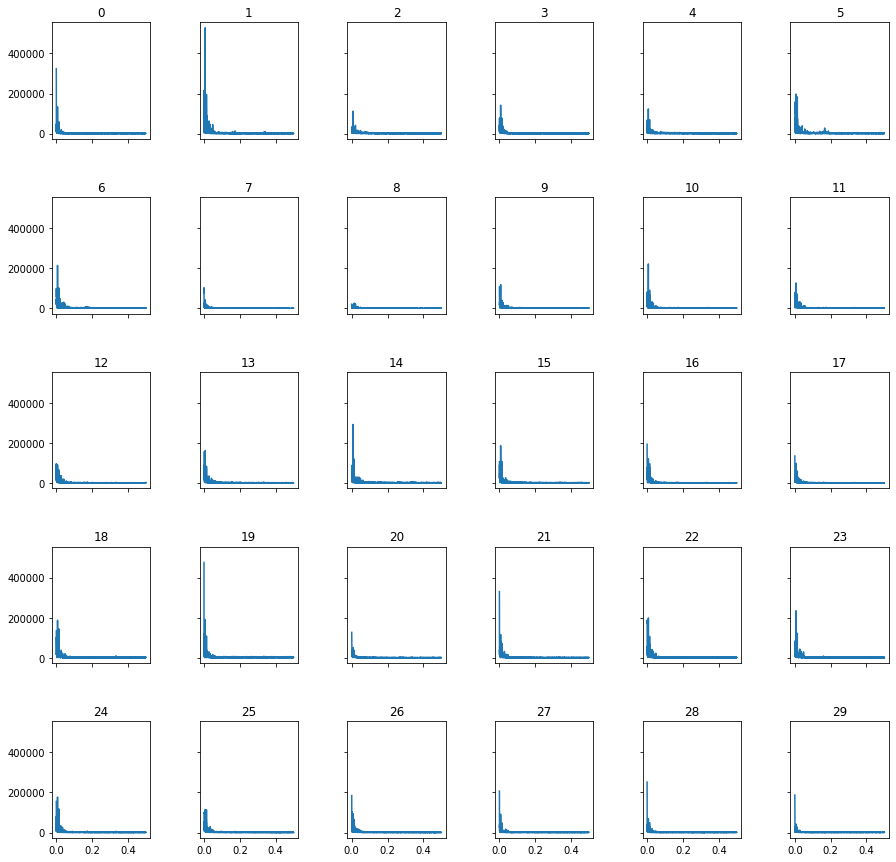

In [ ]:
%matplotlib inline

#Generating fourier features : 
Y = [np.fft.fft(np.array(tsne_train_output[9169*i:9169*(i+1)])) for i in range(30)]
freq = np.fft.fftfreq(9169, 1)
n = len(freq)

fig, axes = plt.subplots(5,6, figsize = (15,15),sharex = True, sharey = True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
#plt.figure(figsize=(40,48))

for i,ax in enumerate(axes.flatten()):
    
    ax.plot(freq[1:int(n/2)], np.abs(Y[i-1])[1:int(n/2)])
    ax.set(title = str(i))

#plt.xlabel("Frequency ")
#plt.ylabel("Amplitude ")
fig.show()

In [ ]:
dod = dict()
for i in range(30):
  dod[i] = dict(zip(freq[1:int(n/2)], np.abs(Y[i])[1:int(n/2)]))

top_freq_larger_1 = []
top_time = []
top_amp = []
cluster = []
top_freq = []

for j in range(30):

  sorted_freq = sorted(dod.get(j), key = dod.get(j).get, reverse=True)
  print(f'\n Top frequencies in Cluster {j}')
  
  for i in range(0,10):
    if sorted_freq[i]*6*24 < 1: 
      print(f'{i+1}th rank Amplitude = {dod.get(j).get(sorted_freq[i]):.3} for frequency {1/(sorted_freq[i]*6*24): .3} days for one complete cycle')
      top_time.append(round(1/(sorted_freq[i]*6*24)))
      top_freq_larger_1.append(0)
      top_freq.append(1/(round(1/(sorted_freq[i]*6*24))))
      
    else :
      print(f'{i+1}th rank Amplitude = {dod.get(j).get(sorted_freq[i]):.3} for frequency {(sorted_freq[i]*6*24): .3} in cycles per day')
      top_freq_larger_1.append(round(sorted_freq[i]*6*24))
      top_time.append(0)
      top_freq.append(round(sorted_freq[i]*6*24))
    
    cluster.append(j)
    top_amp.append(dod.get(j).get(sorted_freq[i]))
    



 Top frequencies in Cluster 0
1th rank Amplitude = 5.29e+05 for frequency  1.01 in cycles per day
2th rank Amplitude = 2.58e+05 for frequency  1.01 days for one complete cycle
3th rank Amplitude = 2.17e+05 for frequency  7.07 days for one complete cycle
4th rank Amplitude = 1.95e+05 for frequency  1.99 in cycles per day
5th rank Amplitude = 1.4e+05 for frequency  1.02 in cycles per day
6th rank Amplitude = 1.28e+05 for frequency  1.85 in cycles per day
7th rank Amplitude = 1.28e+05 for frequency  1.03 days for one complete cycle
8th rank Amplitude = 1.03e+05 for frequency  2.01 in cycles per day
9th rank Amplitude = 9.21e+04 for frequency  2.14 in cycles per day
10th rank Amplitude = 9.12e+04 for frequency  1.16 days for one complete cycle

 Top frequencies in Cluster 1
1th rank Amplitude = 1.12e+05 for frequency  1.01 in cycles per day
2th rank Amplitude = 4.14e+04 for frequency  3.0 in cycles per day
3th rank Amplitude = 3.35e+04 for frequency  2.98 in cycles per day
4th rank Amplit

In [ ]:
assert len(top_freq) == len(top_amp) == len(cluster) == len(top_freq_larger_1) == len(top_time)

# Data frame of Cluster wise Top 10 Amplitude waves & their respective frequencies -  
df_top_freq = pd.DataFrame(data = list(zip(cluster, top_amp, top_freq, top_time, top_freq_larger_1)), columns= ["Cluster #","Top Amplitude","Top Frequency(Cylces/Day)","Top Time(Days/Cycles)","Top Freq >1(Cycles/Day)"])

# df_top_freq sorted by cluster, frequency and then by their amplitudes in descending order -
df_sorted = df_top_freq.sort_values(by = ['Cluster #','Top Frequency(Cylces/Day)','Top Amplitude'], ascending=False)

# dropping duplicates frequencies which are round about same and keeping its first occurance i.e. with largest amplitude
# for instance freq 1.04 and 1.10 are rounded of 1 & 1, 1.04 & 1.10 has amplitude of 10,000 & 9,500 so keeping 1.04 i.e.
# rounded of to 1 and has highest amplitude among themselves -   
df_droped = df_sorted.drop_duplicates(subset = ['Cluster #','Top Frequency(Cylces/Day)'], keep='first')

#sorting them according to amplitudes  -
df_droped = df_droped.sort_values(by = ['Cluster #','Top Amplitude'], ascending=False)

#keeping top 3 w.r.t. to ampltidue frequencies from df_droped - 
df_top3 = pd.DataFrame()

for i in range(30):
  df = df_droped[df_droped['Cluster #'] == i][0:3]
  df_top3 = df_top3.append(df)

In [ ]:
from folium.features import DivIcon
cluster_latlon = df_train[['lat','lon']].drop_duplicates()

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
k=0;

for i,j in cluster_latlon.iterrows():
    
    folium.Marker(list((j['lat'],j['lon'])), icon=DivIcon(
        icon_size=(100,25),
        icon_anchor=(7,20),
        html='<div style="font-size: 18pt; color : red">'+str(k)+'</div>',
        )).add_to(map_osm)

    k+=1

map_osm

In [ ]:
for i in range(0,30):
  
  YCopy = Y[i].copy()

  YCopy[int(len(YCopy)/2)+1:] = 0
  YCopy[np.where(abs(Y[i]) != top_amp[3*(i+1)-1])] = 0

  if i == 0 :
    fourier_top3 = np.fft.ifft(YCopy)
  else : 
    fourier_top3 = np.append(fourier_top3, np.fft.ifft(YCopy))


In [ ]:
for i in range(0,30):
  
  YCopy = Y[i].copy()

  YCopy[int(len(YCopy)/2)+1:] = 0
  YCopy[np.where(abs(Y[i]) != top_amp[3*(i+1)-3])] = 0

  if i == 0 :
    fourier_top1 = np.fft.ifft(YCopy)
  else : 
    fourier_top1 = np.append(fourier_top1, np.fft.ifft(YCopy))

In [ ]:
for i in range(0,30):
  
  YCopy = Y[i].copy()

  YCopy[int(len(YCopy)/2)+1:] = 0
  YCopy[np.where(abs(Y[i]) != top_amp[3*(i+1)-2])] = 0

  
  if i == 0 :
    fourier_top2 = np.fft.ifft(YCopy)
  else : 
    fourier_top2 = np.append(fourier_top2, np.fft.ifft(YCopy))

In [ ]:
assert len(fourier_top1) == len(fourier_top2) == len(fourier_top3)

In [ ]:
chf1 = []; chf2 = []; chf3 = [];
cha1 = []; cha2 = []; cha3 = [];

for i in range(30):

  ha1 = [df_top3['Top Amplitude'].iloc[3*i]]*9169; ha2 = [df_top3['Top Amplitude'].iloc[3*i+1]]*9169; ha3 = [df_top3['Top Amplitude'].iloc[3*i+2]]*9169
  hf1 = [df_top3['Top Frequency(Cylces/Day)'].iloc[3*i]]*9169; hf2 = [df_top3['Top Frequency(Cylces/Day)'].iloc[3*i+1]]*9169; hf3 = [df_top3['Top Frequency(Cylces/Day)'].iloc[3*i+2]]*9169
  
  chf1 = np.hstack([chf1,hf1]); chf2 = np.hstack([chf2,hf2]); chf3 = np.hstack([chf3,hf3]);
  cha1 = np.hstack([cha1,ha1]); cha2 = np.hstack([cha2,ha2]); cha3 = np.hstack([cha3,ha3]); 

assert len(chf1) == len(chf2) == len(chf3) == len(cha1) == len(cha2) == len(cha3)

df_train['fr_1'] = chf1; df_train['fr_2'] = chf2; df_train['fr_3'] = chf3
df_train['am_1'] = cha1; df_train['am_2'] = cha2; df_train['am_3'] = cha3

df_test = df_test.merge(df_train[['lat','lon','fr_1','fr_2','fr_3','am_1','am_2','am_3']].drop_duplicates(), how = 'left' ,on = ['lat','lon'])

assert df_test.shape[1] == df_train.shape[1] 

df_train.to_pickle("../final_train.pkl")
df_test.to_pickle("../final_test.pkl")

In [ ]:
with open('../final_train.pkl', 'rb') as tr, open('../final_test.pkl', 'rb') as ts:
  df_train = pickle.load(tr)
  df_test = pickle.load(ts)

In [ ]:
print(df_train.shape, df_test.shape, len(tsne_train_output), len(tsne_test_output))

(275070, 15) (117900, 15) 275070 117900


####**1D Tradeoff plots**

In [ ]:
#@title
def tradeoff_plot1D(params, TestScore, TrainScore, ax = None, xlabel = "Parameter", ylabel = "Score", plt_test = {}, plt_train = {}) :

  
    """

    params : Parameters of GridSearchCV or RandomSearchCV, can be obtained from .cv_results_['name of parameter'] attribute
  
    TestScore : "y" values for test plot, obtain using .cv_results_['mean_test_score'] 
              attribute of GrdiSearchCV or RandomSearchCV object 
  
    TrainScore : "y" values for train plot, obtain using cv_results_['mean_train_score'] 
              attribute of GrdiSearchCV or RandomSearchCV object 
  
    **plt_test : create a dictionary with keys as argument names and their respective values as items for train plot
  
    **plt_train : create a dictionary with keys as argument names and their respective values as items for train plot

    ax : can assign axes if None then automatically takes current axes
    
    """

    if "color" not in plt_train.keys():
      plt_train['color'] = "green"

    if "marker" not in plt_train.keys():
        plt_train['marker'] = "o"

    if "color" not in plt_test.keys():
      plt_test['color'] = "red"

    if "marker" not in plt_test.keys():
        plt_test['marker'] = "o"


    plt.plot(params, TestScore, label = "Performance on Validation Data", **plt_test)
    plt.plot(params, TrainScore, label = "Performance on Training Data", **plt_train)
    plt.legend()
    plt.xticks(params, rotation = -45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Train vs Val. Performance")

    if ax == None : 
        ax = plt.gca()
        ax.set_xscale('log')
        fig = plt.gcf()
        fig.set_size_inches(11,8)


#### **2D Tradeoff plots**

In [ ]:
#@title
def tradeoff_plot2D(param_first, param_second, mean_test_score, mean_train_score, xlabel = "Parameter second", ylabel = "Parameter first"):

    ValScoreMat =  np.asarray(mean_test_score).reshape(len(param_first), len(param_second));
    TrainScoreMat = np.asarray(mean_train_score).reshape(len(param_first), len(param_second));

    DValScore = pd.DataFrame(ValScoreMat, columns = param_second, index = param_first)
    DTrainScore = pd.DataFrame(TrainScoreMat, columns = param_second, index = param_first)

    plt.rcParams['figure.figsize'] = [20, 10]  

    fig=plt.figure(figsize=(18, 16), dpi= 250)
    fig, (ax1, ax2) =plt.subplots(1,2)

    sns.heatmap(DValScore, cmap = "YlGnBu", linewidths=0.0025, cbar = False, annot = True, ax=ax1, fmt='.3f' )
    sns.heatmap(DTrainScore, cmap = "YlGnBu", linewidths=0.0025, cbar = False, annot = True, ax=ax2, fmt='.3f')

    ax1.set_title('Validation plot')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)


    ax2.set_title('Training plot')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)


    fig.show()

In [ ]:
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# -------------------------
# default paramters
# sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# some of methods of LinearRegression()
# fit(X, y[, sample_weight])	Fit linear model.
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict using the linear model
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# set_params(**params)	Set the parameters of this estimator.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1-2-copy-8/
# -----------------------

from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Creating MAPE score using make_scorer - 
def MAPE(y, y_pred) :
  return mean_absolute_error(y,y_pred)/(sum(y)/len(y)) 

MAPE_scorer = make_scorer(MAPE, greater_is_better = False)


steps_ridge = Pipeline([('scaler', StandardScaler()),('ridge', Ridge(max_iter=10000))])
steps_lasso = Pipeline([('scaler', StandardScaler()),('lasso', Lasso(max_iter=10000))])
steps_elasticnet = Pipeline([('scaler', StandardScaler()),('elasticnet', ElasticNet(max_iter=10000))])

ridge_space =  {'ridge__alpha' : np.logspace(-10, 10, num = 21)}
lasso_space =  {'lasso__alpha' : np.logspace(-10, 10, num = 21)}
elasnet_space = {'elasticnet__alpha': np.logspace(-10, 10, num = 21), 'elasticnet__l1_ratio' : np.linspace(0.1,0.9,8)}

OptRidge = GridSearchCV(steps_ridge, ridge_space, scoring = MAPE_scorer, 
                         cv = TimeSeriesSplit(n_splits = 3), 
                         return_train_score=True, n_jobs=-1)

OptLasso = GridSearchCV(steps_lasso, lasso_space, scoring = MAPE_scorer, 
                         cv = TimeSeriesSplit(n_splits = 3), 
                         return_train_score=True, n_jobs=-1)

OptElasnet = GridSearchCV(steps_elasticnet, elasnet_space, scoring = MAPE_scorer, 
                         cv = TimeSeriesSplit(n_splits = 3), 
                         return_train_score=True, n_jobs=-1)

grids = [OptRidge, OptLasso, OptElasnet]
grid_dict = {0:'Ridge', 1:'Lasso', 2:'Elasticnet'}

best_mape = 1
best_regress = 0
best_gs = ''

for idx, gs in enumerate(grids):
  print('\nEstimator: %s' % grid_dict[idx])	
  gs.fit(df_train, tsne_train_output)
  print('Best params: %s' % gs.best_params_)
  print('Least training MAPE: %.5f' % abs(gs.best_score_))
	
  y_pred = gs.predict(df_test)
  print('Test set MAPE for best params: %.5f ' % MAPE(tsne_test_output, y_pred))
	
  if MAPE(tsne_test_output, y_pred) < best_mape:
	  best_mape = MAPE(tsne_test_output, y_pred)
	  best_gs = gs
	  best_regress = idx

print('\nRegressor with least MAPE: %s' % grid_dict[best_regress])

#y_pred = lr_reg.predict(df_test_trns)
#lr_test_predictions = [round(value) for value in y_pred]
#y_pred = lr_reg.predict(df_train)
#lr_train_predictions = [round(value) for value in y_pred]




Estimator: Ridge
Best params: {'ridge__alpha': 1e-10}
Least training MAPE: 0.12377
Test set MAPE for best params: 0.11888 

Estimator: Lasso
Best params: {'lasso__alpha': 1e-10}
Least training MAPE: 0.12386
Test set MAPE for best params: 0.11885 

Estimator: Elasticnet
Best params: {'elasticnet__alpha': 1e-10, 'elasticnet__l1_ratio': 0.9}
Least training MAPE: 0.12386
Test set MAPE for best params: 0.11885 

Regressor with least MAPE: Elasticnet


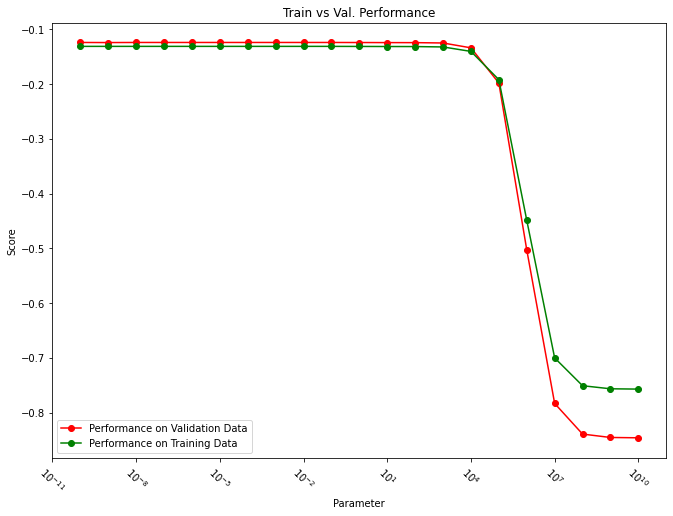

In [ ]:
%matplotlib inline

tradeoff_plot1D(params = grids[0].cv_results_["param_ridge__alpha"], 
                TestScore = grids[0].cv_results_['mean_test_score'], 
                TrainScore = grids[0].cv_results_['mean_train_score'])


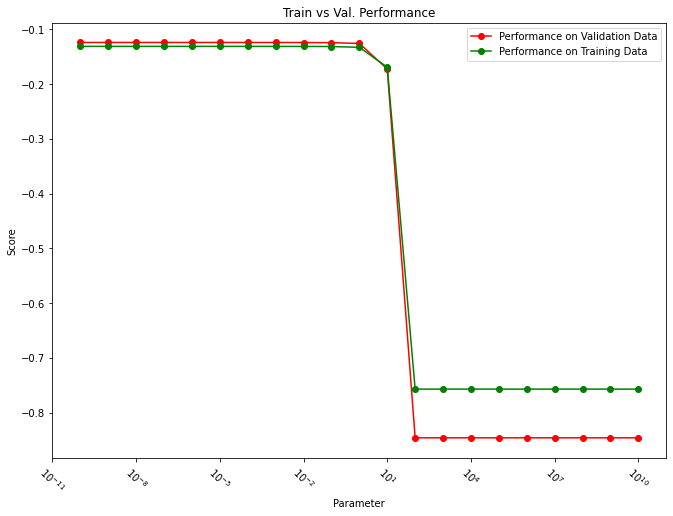

In [ ]:
tradeoff_plot1D(params = grids[1].cv_results_["param_lasso__alpha"], 
                TestScore = grids[1].cv_results_['mean_test_score'], 
                TrainScore = grids[1].cv_results_['mean_train_score'])

In [ ]:
y_pred = best_gs.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = best_gs.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]

In [ ]:
print("Train MAPE : ", (mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)),
      "Test MAPE : ", (mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

Train MAPE :  0.1261206097234014 Test MAPE :  0.1187957146179019


### Using Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# Training a hyper-parameter tuned random forest regressor on our train data
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# -------------------------
# default paramters
# sklearn.ensemble.RandomForestRegressor(n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)

# some of methods of RandomForestRegressor()
# apply(X)	Apply trees in the forest to X, return leaf indices.
# decision_path(X)	Return the decision path in the forest
# fit(X, y[, sample_weight])	Build a forest of trees from the training set (X, y).
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict regression target for X.
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# -----------------------

## Creating MAPE score using make_scorer - 
def MAPE(y, y_pred) :
  return mean_absolute_error(y,y_pred)/(sum(y)/len(y)) 

MAPE_scorer = make_scorer(MAPE, greater_is_better = False)

#loguniform(1e-5, 1e-4)

RF_space =  [ 
             
             {   
                 'max_features' : ['auto', 8, 10, 12] ,
                 'min_samples_leaf' : [1, 3, 5],
                 'min_samples_split' : [7, 10, 20, 50],
                 'max_samples' : [0.05, 0.1, 0.2, 0.5]
              },
              
              {   
                 'max_features' : ['auto', 8, 10, 12] ,
                 'min_samples_leaf' : [20, 50],
                 'min_samples_split' : [60, 80, 100],
                 'max_samples' : [0.05, 0.1, 0.2, 0.5]
              },
             
             {   
                 'max_features' : ['auto', 8, 10, 12] ,
                 'min_samples_leaf' : [70, 90],
                 'min_samples_split' : [100, 120, 150],
                 'max_samples' : [0.05, 0.1, 0.2, 0.5]
              }
             
            ]
            
regr1 = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 37)
OptRF = RandomizedSearchCV(estimator = regr1, param_distributions = RF_space, n_iter = 250, scoring = MAPE_scorer, 
                         cv = TimeSeriesSplit(n_splits = 3), 
                         return_train_score=True, n_jobs=-1, random_state = 101)

OptRF.fit(df_train, tsne_train_output)
print('Best params: %s' % OptRF.best_params_)
print('Least training MAPE: %.5f' % abs(OptRF.best_score_))

Best params: {'min_samples_split': 120, 'min_samples_leaf': 70, 'max_samples': 0.2, 'max_features': 10}
Least training MAPE: 0.12199


In [ ]:
params = pd.DataFrame(OptRF.cv_results_['params'])
params['test_score'] = OptRF.cv_results_['mean_test_score']
params['train_score'] = OptRF.cv_results_['mean_train_score']

In [ ]:
params.sort_values(by = 'train_score', ascending=False).head(n=20)


min_samples_split  min_samples_leaf  ...  test_score train_score
94                   7                 1  ...   -0.129205   -0.090924
245                  7                 1  ...   -0.128537   -0.092452
178                 10                 1  ...   -0.128257   -0.096217
10                  10                 1  ...   -0.127983   -0.096593
108                 10                 1  ...   -0.127863   -0.097093
220                  7                 3  ...   -0.126255   -0.097739
169                 10                 1  ...   -0.127744   -0.097766
103                 10                 3  ...   -0.126729   -0.099608
236                 10                 3  ...   -0.126212   -0.100237
24                  10                 3  ...   -0.125366   -0.101698
198                 10                 5  ...   -0.126084   -0.103410
145                  7                 5  ...   -0.125587   -0.104103
5                   10                 5  ...   -0.125587   -0.104103
124                 10                 5  ...   -0.125442   -0.104796
218                 10                 5  ...   -0.125561   -0.105790
21                  20                 1  ...   -0.126418   -0.106444
206                 20                 1  ...   -0.126354   -0.106798
67                  20                 1  ...   -0.126464   -0.107138
38                  20                 1  ...   -0.125972   -0.107721
215                 20                 3  ...   -0.126065   -0.108272

[20 rows x 6 columns]

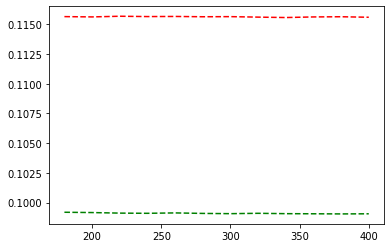

In [ ]:
%matplotlib inline 

test_mape = [] 
train_mape = []
k_val = []

for k in range(180, 420, 20):
  
  regress = RandomForestRegressor(n_estimators=k, criterion = "mse", max_features = 10, max_samples = 0.5, min_samples_split = 10, 
                                   min_samples_leaf = 5, n_jobs=-1)
  
  regress.fit(df_train, tsne_train_output)
  
  y_pred = regress.predict(df_test)
  rndf_test_predictions = [round(value) for value in y_pred]
  
  y_pred = regress.predict(df_train)
  rndf_train_predictions = [round(value) for value in y_pred]
  
  k_val.append(k)
  test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
  train_mape.append(((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output))))

plt.plot(k_val, train_mape, 'g--', k_val, test_mape, 'r--')

In [ ]:
# max_samples_split = 7, max_samples_leaf = 3, max_samples = 0.5 & max_features = 8

for k, trm, tsm in  zip(k_val, train_mape, test_mape):
  print(f'{k},{trm: .5},{tsm: .5}')

180, 0.091973, 0.11579
200, 0.091891, 0.11574
220, 0.091919, 0.11569
240, 0.091877, 0.11567
260, 0.091853, 0.11568
280, 0.091869, 0.11567
300, 0.091836, 0.11568
320, 0.091837, 0.11569
340, 0.09178, 0.11566
360, 0.09184, 0.11567
380, 0.091798, 0.11562
400, 0.09178, 0.11565


In [ ]:
# Predicting on test data using our trained random forest model 
# the parameters that we got above are found using grid search

regress = RandomForestRegressor(n_estimators = 400, 
                                max_features = 8,
                                max_samples = 0.5,
                                min_samples_split = 7,
                                min_samples_leaf = 3,
                                criterion = "mse",  
                                n_jobs=-1)

regress.fit(df_train, tsne_train_output)

y_pred = regress.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
  
y_pred = regress.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]

y_pred = regress.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regress.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]

In [ ]:
print("Train MAPE: ",(mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print("Test MAPE: ",(mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

Train MAPE:  0.09180298424304034
Test MAPE:  0.11567166577498152


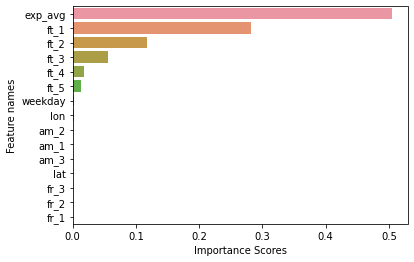

In [ ]:
#feature importances based on analysis using random forest
#df_imps = pd.DataFrame(zip(df_train.columns, Opt.feature_importances_), columns = ['Feat Names', 'Feat Importances'])
#df_imps.sort_values(by = 'Feat Importances', ascending=False)

%matplotlib inline 

NamedFeats = dict(zip(list(df_train.columns),regress.feature_importances_))
SortedFeats = sorted(NamedFeats, key=NamedFeats.get, reverse = True)

def featscorer(featname):
  return NamedFeats.get(featname)

top_scores = map(featscorer, SortedFeats)

fig = sns.barplot(x=list(top_scores), y=SortedFeats)
fig.set(xlabel = 'Importance Scores', ylabel = 'Feature names')

plt.show()

### Using XgBoost Regressor

In [ ]:
#Installing XGBoost with GPU Support - 

!git clone --recursive https://github.com/dmlc/xgboost

!apt remove cmake
!pip install cmake --upgrade

%cd xgboost 

!mkdir build
!cd build
!cmake . -DUSE_CUDA=ON
!make -j4

!pip uninstall xgboost-1.2.0-py3-none-manylinux2010_x86_64.whl

%cd ./python-package/
!python setup.py install --use-cuda --use-nccl # Install the XGBoost to your current Python environment.

In [ ]:
!pip freeze | grep xgboost

xgboost===1.3.0-SNAPSHOT


In [ ]:
from xgboost import XGBRegressor, cv, DMatrix

#### Searching for Optimal number of estimators for learning rate of 0.1 - 

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBRegressor function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#module-xgboost.sklearn
# -------------------------
# default paramters
# xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', 
# booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
# colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
# missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

def MAPE(y_pred, y) :
  return mean_absolute_error(y,y_pred)/(sum(y)/len(y))

def XGMAPE(pred, dtrain) :
  label = dtrain.get_label()
  return ("XGMAPE", mean_absolute_error(label,pred)/(sum(label)/len(label))) 



def modelfit(alg, dtrain, label, useTrainCV = True, cv_folds=3, early_stopping_rounds=50):
    
    if useTrainCV:
        
        tcsv = TimeSeriesSplit(n_splits=cv_folds)
        nfolds = [x for x in tcsv.split(dtrain)]

        xgb_param = alg.get_xgb_params()

        xgtrain = DMatrix(dtrain.values, label=label)

        cvresult = cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, folds = nfolds, 
                      verbose_eval = 10, show_stdv = True, feval = XGMAPE, maximize = False, 
                      early_stopping_rounds = early_stopping_rounds)
        
        alg.set_params(n_estimators=cvresult.shape[0])
        print(f'Optimal Estimators : {cvresult.shape[0]}')
    
    #Fit the algorithm on the data
    alg.fit(dtrain.values, label, eval_metric = MAPE)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain.values)
        
    #Print model report:
    print("\nModel Report")
    print("Training MAPE : %.4g" % MAPE(label, dtrain_predictions))
    print("")                
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')


x_model = XGBRegressor( 
          
          verbosity = 2,
          objective = "reg:squarederror",
          learning_rate =0.1,
          n_estimators=1000,
          max_depth=5,
          min_child_weight=1,
          gamma=0,
          subsample=0.8, 
          colsample_bytree=0.8,
          tree_method = "gpu_hist",
          gpu_id = 0

          )

import time
start_time = time.time()

modelfit(x_model, dtrain = df_train, label =  tsne_train_output, useTrainCV = True, early_stopping_rounds = 500)

print("--- %s seconds ---" % (time.time() - start_time))

#### Searching for optimal Depth and min_child weight via Grid Search - 

In [ ]:
def MAPE(y_pred, y) :
  return mean_absolute_error(y,y_pred)/(sum(y)/len(y))

MAPE_scorer = make_scorer(MAPE, greater_is_better = False)

<Figure size 4500x4000 with 0 Axes>

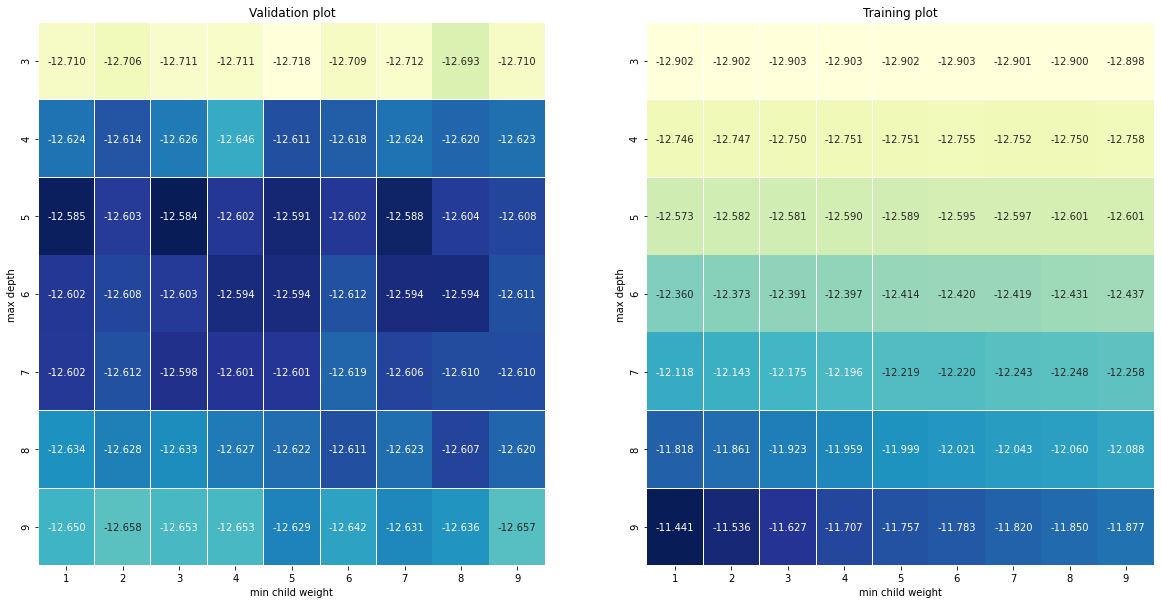

In [ ]:
param_test1 = {
                'max_depth':range(3,10,1),
                'min_child_weight':range(1,10,1)
              }

gsearch1 = GridSearchCV(estimator = XGBRegressor( 
          
                                    verbosity = 2,
                                    objective = "reg:squarederror",
                                    learning_rate =0.1,
                                    n_estimators=70,
                                    max_depth=5,
                                    min_child_weight=1,
                                    gamma=0,
                                    subsample=0.8, 
                                    colsample_bytree=0.8,
                                    tree_method = "gpu_hist",
                                    gpu_id = 0

                                                ),

                        param_grid = param_test1, 
                        scoring = MAPE_scorer, 
                        n_jobs = -1, 
                        cv = TimeSeriesSplit(n_splits=4),
                        return_train_score=True,
                        refit = True)

gsearch1.fit(df_train, tsne_train_output)

%matplotlib inline

max_depth = [x for x in range(3,10,1)]
min_child_weight = [x for x in range(1,10,1)]
TrainScore = list(gsearch1.cv_results_['mean_train_score']*100)
TestScore = list(gsearch1.cv_results_['mean_test_score']*100)

tradeoff_plot2D(max_depth, min_child_weight, TestScore, TrainScore, xlabel = "min child weight", ylabel = "max depth")

In [ ]:
print("Best Params --", gsearch1.best_params_ )

Best Params -- {'max_depth': 5, 'min_child_weight': 3}


#### Searching fot Optimal Gamma, also recalibrating optimal boosting rounds for Learning rate of 0.1 - 

Best Params -- {'gamma': 0}


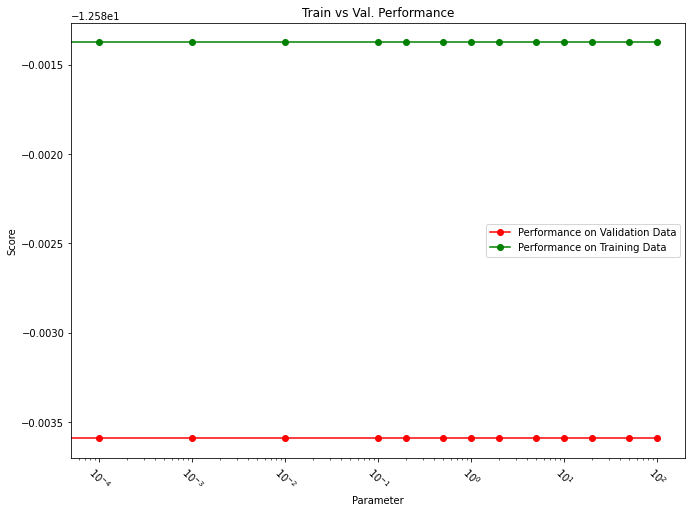

In [ ]:
param_test2 = {
                'gamma':[0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50,100]
              }

gsearch1 = GridSearchCV(estimator = XGBRegressor( 
          
                                    verbosity = 2,
                                    objective = "reg:squarederror",
                                    learning_rate =0.1,
                                    n_estimators=70,
                                    max_depth=5,
                                    min_child_weight=3,
                                    gamma=0,
                                    subsample=0.8, 
                                    colsample_bytree=0.8,
                                    tree_method = "gpu_hist",
                                    gpu_id = 0

                                                ),

                        param_grid = param_test2, 
                        scoring = MAPE_scorer, 
                        n_jobs = -1, 
                        cv = TimeSeriesSplit(n_splits=4),
                        return_train_score=True,
                        refit = True)
                        
gsearch1.fit(df_train, tsne_train_output)

TestScore = gsearch1.cv_results_['mean_test_score']*100
TrainScore = gsearch1.cv_results_['mean_train_score']*100

tradeoff_plot1D(params = gsearch1.cv_results_["param_gamma"], 
                TestScore = TestScore, 
                TrainScore = TrainScore)

print("Best Params --", gsearch1.best_params_ )

**Recalibrating number of estimators** -  

In [ ]:
x_model = XGBRegressor( 
          
          verbosity = 2,
          objective = "reg:squarederror",
          learning_rate =0.1,
          n_estimators=1000,
          max_depth=5,
          min_child_weight=3,
          gamma=0,
          subsample=0.8, 
          colsample_bytree=0.8,
          tree_method = "gpu_hist",
          gpu_id = 0

          )

modelfit(x_model, dtrain = df_train, label =  tsne_train_output, useTrainCV = True, early_stopping_rounds = 500)

[0]	train-XGMAPE:0.89643+0.000162544	train-rmse:110.432+1.55861	test-XGMAPE:0.895908+0.00105212	test-rmse:101.889+7.64103
[10]	train-XGMAPE:0.32662+0.00194492	train-rmse:42.2771+0.701404	test-XGMAPE:0.325042+0.00421459	test-rmse:38.9065+3.26976
[20]	train-XGMAPE:0.162038+0.00491058	train-rmse:22.482+0.53745	test-XGMAPE:0.157069+0.00584826	test-rmse:20.7819+2.38642
[30]	train-XGMAPE:0.132518+0.00546094	train-rmse:18.4856+0.514098	test-XGMAPE:0.127233+0.00525925	test-rmse:17.3471+2.35923
[40]	train-XGMAPE:0.128359+0.00546009	train-rmse:17.7991+0.495265	test-XGMAPE:0.123364+0.00506024	test-rmse:16.8426+2.37427
[50]	train-XGMAPE:0.12748+0.00533407	train-rmse:17.6136+0.482942	test-XGMAPE:0.122889+0.00509365	test-rmse:16.7997+2.42114
[60]	train-XGMAPE:0.127056+0.00524264	train-rmse:17.5117+0.46972	test-XGMAPE:0.122805+0.00508445	test-rmse:16.8101+2.45678
[70]	train-XGMAPE:0.12669+0.00518163	train-rmse:17.4371+0.461927	test-XGMAPE:0.12271+0.00500082	test-rmse:16.787+2.43579
[80]	train-XGMAPE:

#### Searching for Optimal Value of Subsample & Colsample by tree :

Best Params --  {'colsample_bytree': 0.8, 'subsample': 0.8}


<Figure size 4500x4000 with 0 Axes>

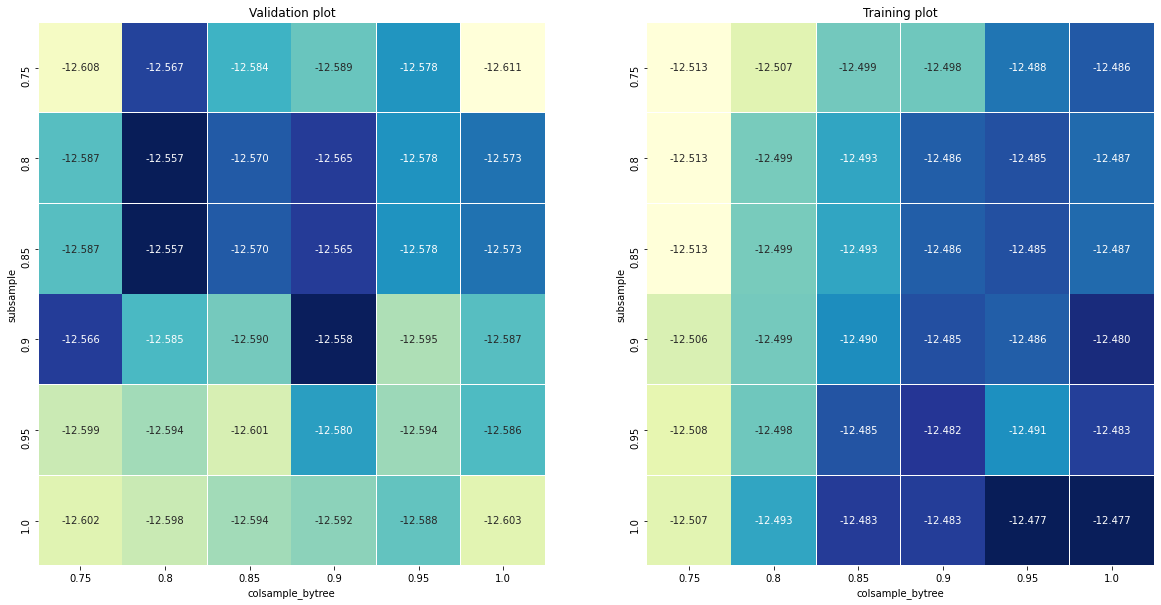

In [ ]:
param_test3 = {
                'subsample' : [x/20 for x in range(15,21)],
                'colsample_bytree' : [x/20 for x in range(15,21)]
              }

gsearch1 = GridSearchCV(estimator = XGBRegressor( 
          
                                    verbosity = 2,
                                    objective = "reg:squarederror",
                                    learning_rate =0.1,
                                    n_estimators=90,
                                    max_depth=5,
                                    min_child_weight=3,
                                    gamma=0,
                                    subsample=0.8, 
                                    colsample_bytree=0.8,
                                    tree_method = "gpu_hist",
                                    gpu_id = 0

                                                ),

                        param_grid = param_test3, 
                        scoring = MAPE_scorer, 
                        n_jobs = -1, 
                        cv = TimeSeriesSplit(n_splits=4),
                        return_train_score=True,
                        refit = True
                        )
                        
gsearch1.fit(df_train, tsne_train_output)

%matplotlib inline

subsample = [x/20 for x in range(15,21)]
colsample_bytree = [x/20 for x in range(15,21)]
TrainScore = list(gsearch1.cv_results_['mean_train_score']*100)
TestScore = list(gsearch1.cv_results_['mean_test_score']*100)

tradeoff_plot2D(subsample, colsample_bytree, TestScore, TrainScore, xlabel = "colsample_bytree", ylabel = "subsample")

print("Best Params -- ", gsearch1.best_params_)

#### Searching for Best Regularization Parameters reg_alpha & reg_lambda- 

Best Params -- {'reg_alpha': 200, 'reg_lambda': 1}


<Figure size 4500x4000 with 0 Axes>

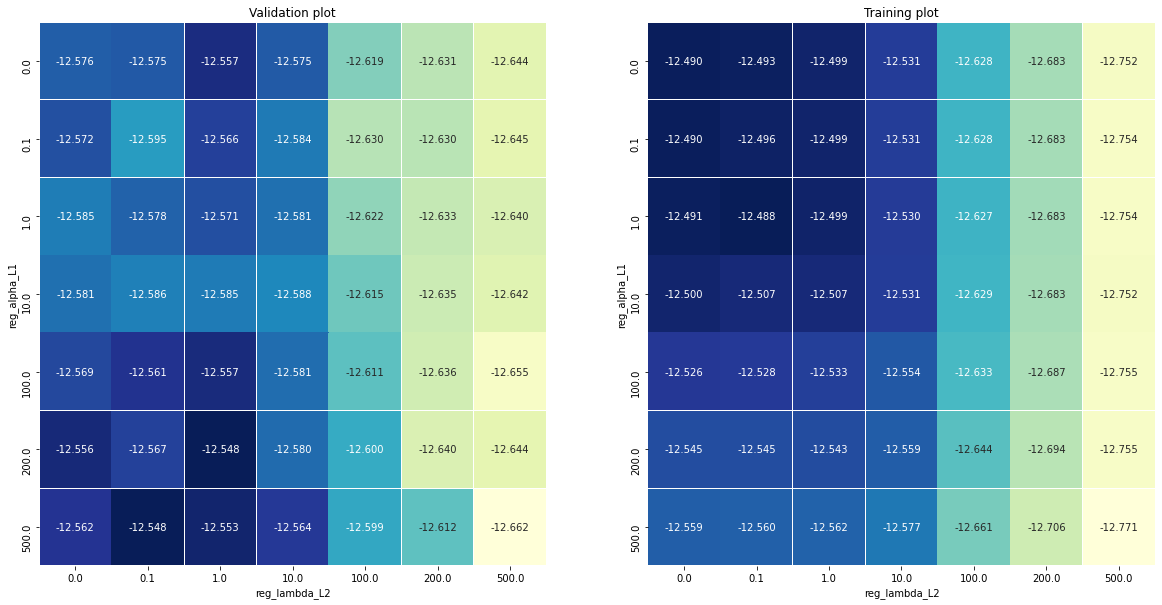

In [ ]:
param_test4 = {
                'reg_alpha' : [0, 0.1, 1, 10, 100, 200, 500],
                'reg_lambda' : [0, 0.1, 1, 10, 100, 200, 500]
              }

gsearch1 = GridSearchCV(estimator = XGBRegressor( 
          
                                    verbosity = 2,
                                    objective = "reg:squarederror",
                                    learning_rate =0.1,
                                    n_estimators=90,
                                    max_depth=5,
                                    min_child_weight=3,
                                    gamma=0,
                                    subsample=0.8, 
                                    colsample_bytree=0.8,
                                    tree_method = "gpu_hist",
                                    gpu_id = 0,
                                    reg_alpha = 0,
                                    reg_lambda = 1,

                                                ),

                        param_grid = param_test4, 
                        scoring = MAPE_scorer, 
                        n_jobs = -1, 
                        cv = TimeSeriesSplit(n_splits=4),
                        return_train_score=True,
                        refit = True
                        )

gsearch1.fit(df_train, tsne_train_output)

%matplotlib inline
reg_alpha = [0, 0.1, 1, 10, 100, 200, 500]
reg_lambda = [0, 0.1, 1, 10, 100, 200, 500]
TrainScore = list(gsearch1.cv_results_['mean_train_score']*100)
TestScore = list(gsearch1.cv_results_['mean_test_score']*100)

tradeoff_plot2D(reg_alpha, reg_lambda, TestScore, TrainScore, xlabel = "reg_lambda_L2", ylabel = "reg_alpha_L1")

print("Best Params --", gsearch1.best_params_)

#### Reducing Learning rate to add more trees - 

In [ ]:
x_model = XGBRegressor( 
          
          verbosity = 2,
          objective = "reg:squarederror",
          learning_rate =0.03,
          n_estimators=1000,
          max_depth=5,
          min_child_weight=3,
          gamma=0,
          subsample=0.8, 
          colsample_bytree=0.8,
          tree_method = "gpu_hist",
          reg_alpha = 200,
          reg_lambda = 1,
          gpu_id = 0

          )

modelfit(x_model, dtrain = df_train, label =  tsne_train_output, useTrainCV = True, early_stopping_rounds = 250)

[0]	train-XGMAPE:0.965386+9.96304e-05	train-rmse:118.772+1.67226	test-XGMAPE:0.964928+0.000820709	test-rmse:109.608+8.20505
[10]	train-XGMAPE:0.715173+0.000506096	train-rmse:88.5762+1.27349	test-XGMAPE:0.714631+0.00191241	test-rmse:81.654+6.16928
[20]	train-XGMAPE:0.531344+0.000838215	train-rmse:66.5506+1.00086	test-XGMAPE:0.530541+0.00306487	test-rmse:61.2825+4.73052
[30]	train-XGMAPE:0.397712+0.00150278	train-rmse:50.6591+0.819596	test-XGMAPE:0.396693+0.00383062	test-rmse:46.6266+3.75442
[40]	train-XGMAPE:0.302184+0.00238785	train-rmse:39.3745+0.694161	test-XGMAPE:0.300554+0.00440415	test-rmse:36.2373+3.10372
[50]	train-XGMAPE:0.236164+0.00349654	train-rmse:31.5568+0.618233	test-XGMAPE:0.233417+0.00494124	test-rmse:29.0584+2.71541
[60]	train-XGMAPE:0.192687+0.00440199	train-rmse:26.3175+0.57619	test-XGMAPE:0.188789+0.00548776	test-rmse:24.2712+2.51018
[70]	train-XGMAPE:0.165445+0.00501138	train-rmse:22.9385+0.557042	test-XGMAPE:0.160795+0.00549678	test-rmse:21.2028+2.40729
[80]	train

#### **Final Model Evalution by calculating MAPE on Test Set** - 

In [ ]:
#predicting with our trained Xg-Boost regressor
# the models x_model is already hyper parameter tuned
# the parameters that we got above are found using grid search
x_model = XGBRegressor( 
          
          verbosity = 2,
          objective = "reg:squarederror",
          learning_rate =0.05,
          n_estimators=201,
          max_depth=5,
          min_child_weight=3,
          gamma=0,
          subsample=0.8, 
          colsample_bytree=0.8,
          tree_method = "gpu_hist",
          gpu_id = 0

          )

x_model.fit(df_train, tsne_train_output)
y_pred = x_model.predict(df_test)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = x_model.predict(df_train)
xgb_train_predictions = [round(value) for value in y_pred]

print("train mape : ",(mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print("test mape : ",(mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

train mape :  0.12236931630937485
test mape :  0.1165946071638552


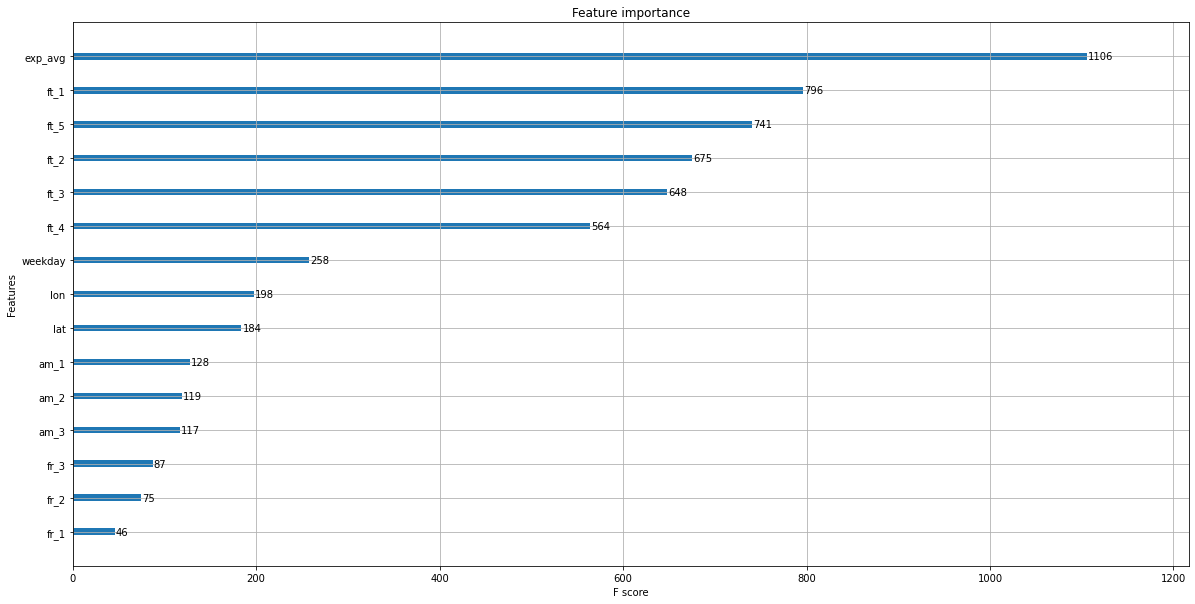

In [ ]:
#feature importances
from xgboost import plot_importance
plot_importance(x_model)

### Calculating the error metric values for various models

In [ ]:
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output,df_train['ft_1'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train['exp_avg'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))

test_mape.append((mean_absolute_error(tsne_test_output, df_test['ft_1'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test['exp_avg'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [ ]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.1305523855372224       Test:  0.1241679443285989
Exponential Averages Forecasting -           Train:  0.12536376178560257       Test:  0.11890489090878156
Linear Regression -                         Train:  0.12236931630937485       Test:  0.1165946071638552
Random Forest Regression -                   Train:  0.09180298424304034      Test:  0.11567166577498152


### Error Metric Matrix

In [ ]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])
print ("XgBoost Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.1305523855372224       Test:  0.1241679443285989
Exponential Averages Forecasting -           Train:  0.12536376178560257       Test:  0.11890489090878156
Linear Regression -                         Train:  0.1261206097234014       Test:  0.1187957146179019
Random Forest Regression -                   Train:  0.09180298424304034      Test:  0.11567166577498152
XgBoost Regression -                         Train:  0.12236931630937485       Test:  0.1165946071638552
--------------------------------------------------------------------------------------------------------


Carefully selecting and preparing fourier features helped to bring down the Test mape to less than 12% for Elastic net based Linear Regression, Random Forest and Xgboost Model. 

Although performance didn't improve a lot moving from Exponentinal Averages Forecasting model to Random Forest Regression or XGBoost Model. Random Forest Model has performed well when compared to Linear Regression and XgBoost Model on both test and train set. 